In [2]:
%run SAT_help_functions.ipynb

In [3]:
directory = "/Users/wangjiashun/Desktop/Research_on_SAT/datasets/SAT-Rafiei"
sub = 1
session = 1
file = directory+"/Subject "+str(sub)+"/Session"+str(session)
file

'/Users/wangjiashun/Desktop/Research_on_SAT/datasets/SAT-Rafiei/Subject 1/Session1'

In [95]:
data_session_sub = sio.loadmat(file)["p"]

# Data preprocessing


In [7]:
for sub in range(30): # over participants

    df_sub = pd.DataFrame(columns = ['contrast', 'SAT', 'rt', 'correct'],)
    for session in range(5): # over session
        file = directory+"/Subject "+str(sub+1)+"/Session"+str(session+1)+'.mat'
        #print(os.path.exists(file))
        if not os.path.exists(file):
            break
        
        data_session_sub = scipy.io.loadmat(file)["p"]

        for i in range(4): # over runs
            for j in range(5): # over blocks
                
                contrast = data_session_sub["data"][0,0][i,j]["contrast"][0,0][0,:]
                rt = data_session_sub["data"][0,0][i,j]["rt"][0,0][0,:]
                correct = data_session_sub["data"][0,0][i,j]["correct"][0,0][0,:]
                
                
                # only keep rt < 3s
                
                contrast = contrast[rt<3]
                correct = correct[rt<3]
                
                rt = rt[rt<3]
                
                SAT = [data_session_sub["condition"][0,0][i,j]]*rt.shape[0]
                ##

                df_block = pd.DataFrame({'contrast':contrast, 
                                         'SAT':np.array(SAT), 
                                         'rt':rt, 
                                         'correct':correct})
                df_sub = pd.concat((df_sub,df_block))

    #print(max(df_sub["rt"]))
    #df_sub.to_csv('data_sub'+str(sub+1)+'.csv')


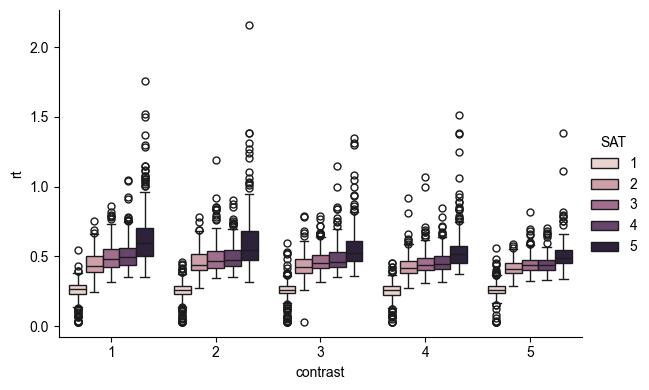

In [8]:
#df_check = df_sub[df_sub.SAT == ]
#df_check = df_sub[df_sub.contrast == 5]

sns.catplot(data=df_sub, x="contrast", y="rt", hue="SAT", kind="box",
            height=4, aspect=6/4)

In [11]:
data_dir = directory+"/data"

In [12]:
i = 0
path = os.path.join(data_dir+str(i+1)+".csv")
df = pd.read_csv(path)
df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/wangjiashun/Desktop/Research_on_SAT/datasets/SAT-Rafiei/data1.csv'

In [15]:
data_dir = "/Users/wangjiashun/Desktop/Research_on_SAT/datasets/SAT-Rafiei/data/data_sub"
df_all = pd.DataFrame(columns = ['contrast', 'SAT', 'participant', 'v','a','ter','k'],)


i=1
for sub in range(30):
    for contrast in range(5):
        for SAT in range(5):
            print(i)
            i+=1
    
            path = os.path.join(data_dir+str(sub+1)+".csv")
            df = pd.read_csv(path)
            df = df[df["contrast"]==contrast+1] # one contrast condition
            df = df[df["SAT"]==SAT+1] # # one SAT condition

            data_sub = np.stack((np.array((df["rt"])), np.array((df["correct"]))), axis = 1)
            samp = Sample.from_numpy_array(data_sub, column_names = [])

            model_fit = Model(name='Simple model (fitted)',
                          drift=DriftLinear(drift=Fittable(minval=0, maxval=6),t = 0,
                                            x=Fittable(minval=-15, maxval=15)),
                          noise=NoiseConstant(noise=1),
                          bound=BoundConstant(B=Fittable(minval=0.5, maxval=8)),
                          overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                          dx=.01, dt=.01, T_dur=5)

            fit_adjust_model(samp, model_fit,
                             fitting_method="differential_evolution",
                             lossfunction=LossRobustBIC, verbose=False)
            
            df_sub = pd.DataFrame(columns = ['contrast', 'SAT', 'participant', 'v','a','ter','k'],)

            df_sub = pd.DataFrame({'contrast':contrast+1, 
                                   'SAT':SAT+1, 
                                   'participant': sub + 1,
                                   'v': np.array(model_fit.parameters()['drift']['drift']), 
                                   'a': np.array(model_fit.parameters()['bound']['B']),
                                   'ter': np.array(model_fit.parameters()['overlay']['nondectime']),
                                   'k': np.array(model_fit.parameters()['drift']['x'])
                                  }, index=[i])
            
            df_all = pd.concat((df_all,df_sub))

            print(df_sub)


1


Info: Params [ 0.         15.          1.10438352  0.11386121] gave 365.7443402680761


   contrast  SAT  participant    v         a       ter     k
2         1    1            1  0.0  1.104384  0.113861  15.0
2


Info: Params [0.65970252 8.66380786 0.75105498 0.2192681 ] gave -37.831696699105976


   contrast  SAT  participant         v         a       ter         k
3         1    2            1  0.659703  0.751055  0.219268  8.663808
3


Info: Params [ 0.36510635 14.53271997  3.21349441  0.19810439] gave -139.66715921601548


   contrast  SAT  participant         v         a       ter         k
4         1    3            1  0.365106  3.213494  0.198104  14.53272
4


Info: Params [ 0.16869896 12.64355782  2.49425408  0.19283824] gave -100.31918165124803


   contrast  SAT  participant         v         a       ter          k
5         1    4            1  0.168699  2.494254  0.192838  12.643558
5


Info: Params [0.56456224 3.35252597 0.79631235 0.25972839] gave 154.26149467068709


   contrast  SAT  participant         v         a       ter         k
6         1    5            1  0.564562  0.796312  0.259728  3.352526
6


Info: Params [ 0.35748718 15.          1.2027124   0.10191458] gave 1128.4984801367416


   contrast  SAT  participant         v         a       ter     k
7         2    1            1  0.357487  1.202712  0.101915  15.0
7


Info: Params [ 0.56953108 10.45687212  0.77282956  0.22237432] gave -145.66882984692856


   contrast  SAT  participant         v        a       ter          k
8         2    2            1  0.569531  0.77283  0.222374  10.456872
8


Info: Params [ 0.51201994 14.87917619  1.34349077  0.24267091] gave -187.81900926302086


   contrast  SAT  participant        v         a       ter          k
9         2    3            1  0.51202  1.343491  0.242671  14.879176
9


Info: Params [ 0.67858115 13.7932361   7.9712857   0.13166542] gave -110.22335350545104


    contrast  SAT  participant         v         a       ter          k
10         2    4            1  0.678581  7.971286  0.131665  13.793236
10


Info: Params [0.77473342 3.82133618 0.75233246 0.28338206] gave 122.9089010098812


    contrast  SAT  participant         v         a       ter         k
11         2    5            1  0.774733  0.752332  0.283382  3.821336
11


Info: Params [ 0.45012862 15.          1.09253074  0.10719497] gave 1146.935056723143


    contrast  SAT  participant         v         a       ter     k
12         3    1            1  0.450129  1.092531  0.107195  15.0
12


Info: Params [ 1.20487171 15.          1.81502625  0.19232192] gave -225.59124499164744


    contrast  SAT  participant         v         a       ter     k
13         3    2            1  1.204872  1.815026  0.192322  15.0
13


Info: Params [ 0.89230963 13.57874031  3.04981231  0.17581233] gave -142.1559432135043


    contrast  SAT  participant        v         a       ter         k
14         3    3            1  0.89231  3.049812  0.175812  13.57874
14


Info: Params [ 1.46285576 14.6700672   7.36852049  0.15049737] gave -175.0201266540488


    contrast  SAT  participant         v        a       ter          k
15         3    4            1  1.462856  7.36852  0.150497  14.670067
15


Info: Params [1.05504563 4.43166614 0.93685059 0.25731461] gave 77.80627717975891


    contrast  SAT  participant         v         a       ter         k
16         3    5            1  1.055046  0.936851  0.257315  4.431666
16


Info: Params [ 0.         15.          0.70016931  0.14300368] gave 910.8231223276604


    contrast  SAT  participant    v         a       ter     k
17         4    1            1  0.0  0.700169  0.143004  15.0
17


Info: Params [ 0.82319861 15.          6.42612033  0.10060569] gave -164.47004742439597


    contrast  SAT  participant         v        a       ter     k
18         4    2            1  0.823199  6.42612  0.100606  15.0
18


Info: Params [ 1.46878354 11.72829697  0.88393494  0.2563444 ] gave -114.75102925545177


    contrast  SAT  participant         v         a       ter          k
19         4    3            1  1.468784  0.883935  0.256344  11.728297
19


Info: Params [ 2.46895914 14.78556637  6.21455458  0.17679832] gave -251.4866687384196


    contrast  SAT  participant         v         a       ter          k
20         4    4            1  2.468959  6.214555  0.176798  14.785566
20


Info: Params [2.56231377 7.2314986  1.03868311 0.29828014] gave -240.59468359448533


    contrast  SAT  participant         v         a      ter         k
21         4    5            1  2.562314  1.038683  0.29828  7.231499
21


Info: Params [6.50800302e-03 1.28450739e+01 9.54970290e-01 1.07515381e-01] gave 583.1699096047794


    contrast  SAT  participant         v        a       ter          k
22         5    1            1  0.006508  0.95497  0.107515  12.845074
22


Info: Params [1.68094772 9.95020458 0.87580759 0.21691745] gave -194.43631229306249


    contrast  SAT  participant         v         a       ter         k
23         5    2            1  1.680948  0.875808  0.216917  9.950205
23


Info: Params [2.63669162 4.59023567 0.53874436 0.27966766] gave -295.18051694866443


    contrast  SAT  participant         v         a       ter         k
24         5    3            1  2.636692  0.538744  0.279668  4.590236
24


Info: Params [ 2.26012293 11.16548212  1.1591225   0.25764512] gave -266.91119745747466


    contrast  SAT  participant         v         a       ter          k
25         5    4            1  2.260123  1.159122  0.257645  11.165482
25


Info: Params [2.87417094 6.8395574  1.11069872 0.27849593] gave -271.26102477660874


    contrast  SAT  participant         v         a       ter         k
26         5    5            1  2.874171  1.110699  0.278496  6.839557
26


Info: Params [0.01443851 4.05272111 0.51878379 0.15485285] gave 441.94025444805396


    contrast  SAT  participant         v         a       ter         k
27         1    1            2  0.014439  0.518784  0.154853  4.052721
27


Info: Params [ 0.         15.          0.50684175  0.15062917] gave 36.60642918716755


    contrast  SAT  participant    v         a       ter     k
28         1    2            2  0.0  0.506842  0.150629  15.0
28


Info: Params [0.         2.28768707 0.94504135 0.10088912] gave 82.1893815133766


    contrast  SAT  participant    v         a       ter         k
29         1    3            2  0.0  0.945041  0.100889  2.287687
29


Info: Params [0.         1.60676443 0.74546047 0.3338447 ] gave 72.69879236130986


    contrast  SAT  participant    v        a       ter         k
30         1    4            2  0.0  0.74546  0.333845  1.606764
30


Info: Params [0.         4.13979292 1.21088441 0.34397757] gave 62.70106596287332


    contrast  SAT  participant    v         a       ter         k
31         1    5            2  0.0  1.210884  0.343978  4.139793
31


Info: Params [ 0.59782441 15.          0.50484566  0.17327865] gave 201.70990406116618


    contrast  SAT  participant         v         a       ter     k
32         2    1            2  0.597824  0.504846  0.173279  15.0
32


Info: Params [ 0.         15.          0.5058898   0.17764126] gave 18.85347891663018


    contrast  SAT  participant    v        a       ter     k
33         2    2            2  0.0  0.50589  0.177641  15.0
33


Info: Params [ 0.00547281 -4.53648729  0.50686842  0.20962157] gave 75.18423912651782


    contrast  SAT  participant         v         a       ter         k
34         2    3            2  0.005473  0.506868  0.209622 -4.536487
34


Info: Params [0.30896214 4.36902632 2.02203641 0.15407555] gave 62.405623269565986


    contrast  SAT  participant         v         a       ter         k
35         2    4            2  0.308962  2.022036  0.154076  4.369026
35


Info: Params [0.         2.60806716 1.56782899 0.10129924] gave 99.70417991222111


    contrast  SAT  participant    v         a       ter         k
36         2    5            2  0.0  1.567829  0.101299  2.608067
36


Info: Params [ 0.         15.          0.88106658  0.11481119] gave 134.46718870968854


    contrast  SAT  participant    v         a       ter     k
37         3    1            2  0.0  0.881067  0.114811  15.0
37


Info: Params [ 0.19107369 14.23655696  0.91221827  0.1025438 ] gave 74.39734457277117


    contrast  SAT  participant         v         a       ter          k
38         3    2            2  0.191074  0.912218  0.102544  14.236557
38


Info: Params [ 0.         -0.49305257  0.70832367  0.11268591] gave 94.56121974646267


    contrast  SAT  participant    v         a       ter         k
39         3    3            2  0.0  0.708324  0.112686 -0.493053
39


Info: Params [ 0.         -2.99679553  0.54655199  0.30797375] gave 76.29069239137267


    contrast  SAT  participant    v         a       ter         k
40         3    4            2  0.0  0.546552  0.307974 -2.996796
40


Info: Params [0.67765213 2.43802654 1.78281076 0.12949637] gave 87.39318476587819


    contrast  SAT  participant         v         a       ter         k
41         3    5            2  0.677652  1.782811  0.129496  2.438027
41


Info: Params [ 0.         15.          0.74412147  0.13564164] gave 134.3834508003183


    contrast  SAT  participant    v         a       ter     k
42         4    1            2  0.0  0.744121  0.135642  15.0
42


Info: Params [ 0.02336809 13.21734898  1.08382847  0.10099406] gave 64.13859808851126


    contrast  SAT  participant         v         a       ter          k
43         4    2            2  0.023368  1.083828  0.100994  13.217349
43


Info: Params [0.         3.27842183 1.22290642 0.11700665] gave 76.31192158096991


    contrast  SAT  participant    v         a       ter         k
44         4    3            2  0.0  1.222906  0.117007  3.278422
44


Info: Params [0.07461222 3.49621959 1.62020608 0.19677562] gave 76.36551159834748


    contrast  SAT  participant         v         a       ter        k
45         4    4            2  0.074612  1.620206  0.196776  3.49622
45


Info: Params [0.08553222 3.2210222  1.04005154 0.36918156] gave 70.81757502871518


    contrast  SAT  participant         v         a       ter         k
46         4    5            2  0.085532  1.040052  0.369182  3.221022
46


Info: Params [ 0.         15.          0.59566143  0.14994699] gave 139.53580715623525


    contrast  SAT  participant    v         a       ter     k
47         5    1            2  0.0  0.595661  0.149947  15.0
47


Info: Params [ 0.         15.          0.50812467  0.17953886] gave 219.55529069594147


    contrast  SAT  participant    v         a       ter     k
48         5    2            2  0.0  0.508125  0.179539  15.0
48


Info: Params [0.07867881 2.94443126 1.16306752 0.10155053] gave 172.8291538512072


    contrast  SAT  participant         v         a       ter         k
49         5    3            2  0.078679  1.163068  0.101551  2.944431
49


Info: Params [0.31145111 3.33417406 0.8548859  0.43990882] gave 59.14401195499368


    contrast  SAT  participant         v         a       ter         k
50         5    4            2  0.311451  0.854886  0.439909  3.334174
50


Info: Params [0.26933334 3.00118377 2.22071081 0.13773255] gave 90.00025135019465


    contrast  SAT  participant         v         a       ter         k
51         5    5            2  0.269333  2.220711  0.137733  3.001184
51


Info: Params [0.07732017 7.33005753 1.47640863 0.10899269] gave 336.88994457489815


    contrast  SAT  participant        v         a       ter         k
52         1    1            3  0.07732  1.476409  0.108993  7.330058
52


Info: Params [ 0.99587003 14.52835866  7.97865055  0.19761828] gave -134.10788820650907


    contrast  SAT  participant        v         a       ter          k
53         1    2            3  0.99587  7.978651  0.197618  14.528359
53


Info: Params [ 0.6794979  12.60826553  2.26331858  0.28055481] gave -112.1172789437273


    contrast  SAT  participant         v         a       ter          k
54         1    3            3  0.679498  2.263319  0.280555  12.608266
54


Info: Params [1.40217132 8.1028658  0.830964   0.35942528] gave -72.22620666341838


    contrast  SAT  participant         v         a       ter         k
55         1    4            3  1.402171  0.830964  0.359425  8.102866
55


Info: Params [0.55478513 2.43301711 0.61620922 0.37959286] gave 114.4719592373323


    contrast  SAT  participant         v         a       ter         k
56         1    5            3  0.554785  0.616209  0.379593  2.433017
56


Info: Params [0.3278036  7.89694449 1.66540841 0.10918698] gave 120.18659201437977


    contrast  SAT  participant         v         a       ter         k
57         2    1            3  0.327804  1.665408  0.109187  7.896944
57


Info: Params [ 1.85027773 15.          6.21460481  0.229944  ] gave -117.16533889573701


    contrast  SAT  participant         v         a       ter     k
58         2    2            3  1.850278  6.214605  0.229944  15.0
58


Info: Params [ 1.37017747 10.65635902  0.72336941  0.35600918] gave -171.027437217981


    contrast  SAT  participant         v         a       ter          k
59         2    3            3  1.370177  0.723369  0.356009  10.656359
59


Info: Params [1.33394618 6.6833402  0.72974213 0.34319188] gave -76.07790467400106


    contrast  SAT  participant         v         a       ter        k
60         2    4            3  1.333946  0.729742  0.343192  6.68334
60


Info: Params [1.17073055 4.93389077 1.14115739 0.30341586] gave 77.96826564131385


    contrast  SAT  participant         v         a       ter         k
61         2    5            3  1.170731  1.141157  0.303416  4.933891
61


Info: Params [0.58297979 7.68692758 1.56566562 0.10580151] gave 14.992459037611628


    contrast  SAT  participant        v         a       ter         k
62         3    1            3  0.58298  1.565666  0.105802  7.686928
62


Info: Params [ 2.75787359 14.73801038  2.36614429  0.28397296] gave -313.76235332529143


    contrast  SAT  participant         v         a       ter         k
63         3    2            3  2.757874  2.366144  0.283973  14.73801
63


Info: Params [2.21804259 9.24114278 0.81957496 0.34875406] gave -209.63667372118533


    contrast  SAT  participant         v         a       ter         k
64         3    3            3  2.218043  0.819575  0.348754  9.241143
64


Info: Params [2.66530403 7.8129845  0.70331128 0.36130485] gave -280.12148152639276


    contrast  SAT  participant         v         a       ter         k
65         3    4            3  2.665304  0.703311  0.361305  7.812985
65


Info: Params [1.69415158 3.53331465 1.16873048 0.28810707] gave -6.459263812940808


    contrast  SAT  participant         v        a       ter         k
66         3    5            3  1.694152  1.16873  0.288107  3.533315
66


Info: Params [1.12086906 6.29516985 1.23855251 0.11821571] gave 351.4111364067978


    contrast  SAT  participant         v         a       ter        k
67         4    1            3  1.120869  1.238553  0.118216  6.29517
67


Info: Params [ 3.12026352 14.97261767  5.39805101  0.23203844] gave -254.09013326798612


    contrast  SAT  participant         v         a       ter          k
68         4    2            3  3.120264  5.398051  0.232038  14.972618
68


Info: Params [ 3.8062112  13.82330593  4.60114345  0.25751316] gave -375.66536348020645


    contrast  SAT  participant         v         a       ter          k
69         4    3            3  3.806211  4.601143  0.257513  13.823306
69


Info: Params [3.77657954 7.92159888 0.91605709 0.34536954] gave -390.50765981659873


    contrast  SAT  participant        v         a      ter         k
70         4    4            3  3.77658  0.916057  0.34537  7.921599
70


Info: Params [2.49906942 3.28952057 1.69024111 0.22718633] gave -171.6295861599629


    contrast  SAT  participant         v         a       ter         k
71         4    5            3  2.499069  1.690241  0.227186  3.289521
71


Info: Params [1.59712692 4.65264969 0.84091368 0.14887608] gave -65.40067541155442


    contrast  SAT  participant         v         a       ter        k
72         5    1            3  1.597127  0.840914  0.148876  4.65265
72


Info: Params [ 5.51807553 15.          3.9783195   0.27712464] gave -537.3401565929856


    contrast  SAT  participant         v        a       ter     k
73         5    2            3  5.518076  3.97832  0.277125  15.0
73


Info: Params [ 4.68333882 14.93695131  7.30429802  0.23031924] gave -459.5950889767174


    contrast  SAT  participant         v         a       ter          k
74         5    3            3  4.683339  7.304298  0.230319  14.936951
74


Info: Params [4.43010583 6.15661655 0.68373414 0.35451116] gave -502.7840398535587


    contrast  SAT  participant         v         a       ter         k
75         5    4            3  4.430106  0.683734  0.354511  6.156617
75


Info: Params [3.25542672 5.86214419 1.04449675 0.3305048 ] gave -289.55676389382705


    contrast  SAT  participant         v         a       ter         k
76         5    5            3  3.255427  1.044497  0.330505  5.862144
76


Info: Params [ 0.02579859 15.          2.03705712  0.10056952] gave -24.420366294523195


    contrast  SAT  participant         v         a      ter     k
77         1    1            4  0.025799  2.037057  0.10057  15.0
77


Info: Params [ 0.09896815 15.          0.96485986  0.19421411] gave -211.80465343779895


    contrast  SAT  participant         v        a       ter     k
78         1    2            4  0.098968  0.96486  0.194214  15.0
78


Info: Params [ 0.06236926 13.85742541  2.4728114   0.17319883] gave -139.2516011051812


    contrast  SAT  participant         v         a       ter          k
79         1    3            4  0.062369  2.472811  0.173199  13.857425
79


Info: Params [ 0.79967001 15.          6.84629143  0.17852679] gave -156.81341847943946


    contrast  SAT  participant        v         a       ter     k
80         1    4            4  0.79967  6.846291  0.178527  15.0
80


Info: Params [ 0.50996696 10.70531548  1.71556016  0.26415389] gave -57.887041216634984


    contrast  SAT  participant         v        a       ter          k
81         1    5            4  0.509967  1.71556  0.264154  10.705315
81


Info: Params [ 0.35952922 15.          0.5093043   0.19104021] gave -195.8334618736606


    contrast  SAT  participant         v         a      ter     k
82         2    1            4  0.359529  0.509304  0.19104  15.0
82


Info: Params [ 0.28649125 15.          0.9159539   0.19579154] gave -209.5135034984802


    contrast  SAT  participant         v         a       ter     k
83         2    2            4  0.286491  0.915954  0.195792  15.0
83


Info: Params [ 0.43600269 14.339632    3.34826589  0.15106893] gave -137.36401035615532


    contrast  SAT  participant         v         a       ter          k
84         2    3            4  0.436003  3.348266  0.151069  14.339632
84


Info: Params [ 0.65198518 14.33707256  6.09512538  0.16420702] gave -123.7536383260368


    contrast  SAT  participant         v         a       ter          k
85         2    4            4  0.651985  6.095125  0.164207  14.337073
85


Info: Params [ 1.04736021 10.77085411  1.3086004   0.28068003] gave -16.54465981432222


    contrast  SAT  participant        v       a      ter          k
86         2    5            4  1.04736  1.3086  0.28068  10.770854
86


Info: Params [ 0.31312598 15.          0.93740704  0.15299339] gave -75.28372478150304


    contrast  SAT  participant         v         a       ter     k
87         3    1            4  0.313126  0.937407  0.152993  15.0
87


Info: Params [ 0.3516765  15.          1.11053199  0.18400912] gave -228.64610951068065


    contrast  SAT  participant         v         a       ter     k
88         3    2            4  0.351676  1.110532  0.184009  15.0
88


Info: Params [ 1.19086436 14.53767681  7.8232024   0.10732017] gave -177.1360993570981


    contrast  SAT  participant         v         a      ter          k
89         3    3            4  1.190864  7.823202  0.10732  14.537677
89


Info: Params [ 1.82472693 15.          7.17109246  0.17199209] gave -227.28543890981544


    contrast  SAT  participant         v         a       ter     k
90         3    4            4  1.824727  7.171092  0.171992  15.0
90


Info: Params [1.73570849 8.9735011  0.82668974 0.31478788] gave -158.2219442347999


    contrast  SAT  participant         v        a       ter         k
91         3    5            4  1.735708  0.82669  0.314788  8.973501
91


Info: Params [ 0.56315287 15.          0.50792809  0.19030116] gave -188.24339808479


    contrast  SAT  participant         v         a       ter     k
92         4    1            4  0.563153  0.507928  0.190301  15.0
92


Info: Params [ 0.85521605 15.          1.46402306  0.16159792] gave -222.73153453932727


    contrast  SAT  participant         v         a       ter     k
93         4    2            4  0.855216  1.464023  0.161598  15.0
93


Info: Params [ 1.09483959 15.          5.19946761  0.13775649] gave -206.34184394493968


    contrast  SAT  participant        v         a       ter     k
94         4    3            4  1.09484  5.199468  0.137756  15.0
94


Info: Params [ 2.60619861 14.86221245  7.84889466  0.17636337] gave -266.84980781991953


    contrast  SAT  participant         v         a       ter          k
95         4    4            4  2.606199  7.848895  0.176363  14.862212
95


Info: Params [2.71811276 6.9019857  0.83786643 0.31666681] gave -261.4631050297757


    contrast  SAT  participant         v         a       ter         k
96         4    5            4  2.718113  0.837866  0.316667  6.901986
96


Info: Params [ 0.25265407 13.99975755  1.00413275  0.14944915] gave 121.4369218585304


    contrast  SAT  participant         v         a       ter          k
97         5    1            4  0.252654  1.004133  0.149449  13.999758
97


Info: Params [ 1.06265303 13.95417989  0.6874786   0.21216063] gave -242.78798330690285


    contrast  SAT  participant         v         a       ter         k
98         5    2            4  1.062653  0.687479  0.212161  13.95418
98


Info: Params [ 1.84422424 15.          4.45573313  0.15713835] gave -262.64984681943037


    contrast  SAT  participant         v         a       ter     k
99         5    3            4  1.844224  4.455733  0.157138  15.0
99


Info: Params [ 3.56622803 14.79651053  7.84453425  0.18655435] gave -350.1541182148119


     contrast  SAT  participant         v         a       ter          k
100         5    4            4  3.566228  7.844534  0.186554  14.796511
100


Info: Params [3.65103005 6.39477515 1.05837995 0.30836973] gave -417.6636082871969


     contrast  SAT  participant        v        a      ter         k
101         5    5            4  3.65103  1.05838  0.30837  6.394775
101


Info: Params [ 0.10295925 11.4212745   0.82234537  0.10055825] gave 1116.147008147185


     contrast  SAT  participant         v         a       ter          k
102         1    1            5  0.102959  0.822345  0.100558  11.421274
102


Info: Params [7.42328905e-03 1.17963792e+01 1.62932924e+00 1.09388192e-01] gave 270.63782750491157


     contrast  SAT  participant         v         a       ter          k
103         1    2            5  0.007423  1.629329  0.109388  11.796379
103


Info: Params [ 0.54638824 13.69883131  7.61911177  0.10170206] gave -93.72820017311919


     contrast  SAT  participant         v         a       ter          k
104         1    3            5  0.546388  7.619112  0.101702  13.698831
104


Info: Params [0.64450465 6.98699921 3.22366297 0.10310684] gave 88.42884510501767


     contrast  SAT  participant         v         a       ter         k
105         1    4            5  0.644505  3.223663  0.103107  6.986999
105


Info: Params [0.65841263 5.29469345 1.21406864 0.26999625] gave 136.23924170668462


     contrast  SAT  participant         v         a       ter         k
106         1    5            5  0.658413  1.214069  0.269996  5.294693
106


Info: Params [ 0.02503536 11.38510807  0.81740255  0.10285201] gave 554.1546256353786


     contrast  SAT  participant         v         a       ter          k
107         2    1            5  0.025035  0.817403  0.102852  11.385108
107


Info: Params [ 0.13920449 15.          1.30816254  0.15100788] gave 269.27555786564903


     contrast  SAT  participant         v         a       ter     k
108         2    2            5  0.139204  1.308163  0.151008  15.0
108


Info: Params [ 0.50935083 10.82503855  4.18421316  0.10518052] gave -42.367377594618304


     contrast  SAT  participant         v         a       ter          k
109         2    3            5  0.509351  4.184213  0.105181  10.825039
109


Info: Params [0.84741606 7.95595171 3.35051174 0.14421858] gave 36.199043944290224


     contrast  SAT  participant         v         a       ter         k
110         2    4            5  0.847416  3.350512  0.144219  7.955952
110


Info: Params [0.85770509 4.8744228  1.21603219 0.24652698] gave 130.49549854284544


     contrast  SAT  participant         v         a       ter         k
111         2    5            5  0.857705  1.216032  0.246527  4.874423
111


Info: Params [ 0.11545971 14.45807428  1.06994817  0.10080457] gave 2035.6630070213375


     contrast  SAT  participant        v         a       ter          k
112         3    1            5  0.11546  1.069948  0.100805  14.458074
112


Info: Params [ 0.38249271 14.71019808  2.78427326  0.10347957] gave 306.5855336503771


     contrast  SAT  participant         v         a      ter          k
113         3    2            5  0.382493  2.784273  0.10348  14.710198
113


Info: Params [ 0.7375995  12.83413604  6.29210018  0.11251939] gave -92.13105979919031


     contrast  SAT  participant       v       a       ter          k
114         3    3            5  0.7376  6.2921  0.112519  12.834136
114


Info: Params [1.36773832 8.95601381 1.80162621 0.23683599] gave -72.94710859972757


     contrast  SAT  participant         v         a       ter         k
115         3    4            5  1.367738  1.801626  0.236836  8.956014
115


Info: Params [1.28141192 4.75270398 0.92263463 0.27733356] gave 46.45135968121109


     contrast  SAT  participant         v         a       ter         k
116         3    5            5  1.281412  0.922635  0.277334  4.752704
116


Info: Params [ 0.         15.          1.2071571   0.10604419] gave 759.3430172250452


     contrast  SAT  participant    v         a       ter     k
117         4    1            5  0.0  1.207157  0.106044  15.0
117


Info: Params [ 0.24800365 12.50809797  1.65110818  0.10949647] gave 663.8550268168891


     contrast  SAT  participant         v         a       ter          k
118         4    2            5  0.248004  1.651108  0.109496  12.508098
118


Info: Params [1.36222607 9.99441583 0.78293104 0.23916037] gave -168.33354635548582


     contrast  SAT  participant         v         a      ter         k
119         4    3            5  1.362226  0.782931  0.23916  9.994416
119


Info: Params [ 2.27164372 10.21533422  3.66202658  0.18366624] gave -187.56778092024115


     contrast  SAT  participant         v         a       ter          k
120         4    4            5  2.271644  3.662027  0.183666  10.215334
120


Info: Params [2.51206284 4.92744092 1.13453433 0.28483651] gave -148.3885676931751


     contrast  SAT  participant         v         a       ter         k
121         4    5            5  2.512063  1.134534  0.284837  4.927441
121


Info: Params [ 0.30755228 15.          1.12377311  0.10076695] gave 1505.6571626072312


     contrast  SAT  participant         v         a       ter     k
122         5    1            5  0.307552  1.123773  0.100767  15.0
122


Info: Params [ 0.68533149 14.44596035  1.83800832  0.13879734] gave 115.0499966902073


     contrast  SAT  participant         v         a       ter         k
123         5    2            5  0.685331  1.838008  0.138797  14.44596
123


Info: Params [ 1.44123443 15.          5.22854421  0.14935836] gave -44.13565784613955


     contrast  SAT  participant         v         a       ter     k
124         5    3            5  1.441234  5.228544  0.149358  15.0
124


Info: Params [2.36473275 5.53823922 1.05978457 0.24538558] gave -206.3385852104468


     contrast  SAT  participant         v         a       ter         k
125         5    4            5  2.364733  1.059785  0.245386  5.538239
125


Info: Params [2.86435413 5.15339935 0.90587686 0.30125072] gave -251.16425721646948


     contrast  SAT  participant         v         a       ter         k
126         5    5            5  2.864354  0.905877  0.301251  5.153399
126


Info: Params [1.07860053e-02 1.14942160e+01 1.06262270e+00 1.01858701e-01] gave 440.9499969168628


     contrast  SAT  participant         v         a       ter          k
127         1    1            6  0.010786  1.062623  0.101859  11.494216
127


Info: Params [ 0.50954911 11.40642661  3.93697307  0.1036267 ] gave -47.71142334640426


     contrast  SAT  participant         v         a       ter          k
128         1    2            6  0.509549  3.936973  0.103627  11.406427
128


Info: Params [ 0.8155849  12.1336196   7.99523738  0.14250555] gave -95.23079003007841


     contrast  SAT  participant         v         a       ter         k
129         1    3            6  0.815585  7.995237  0.142506  12.13362
129


Info: Params [0.87979647 9.65837901 2.46722206 0.24773164] gave -33.27397149269946


     contrast  SAT  participant         v         a       ter         k
130         1    4            6  0.879796  2.467222  0.247732  9.658379
130


Info: Params [0.43652442 3.58684842 0.8647018  0.29276757] gave 131.236014655494


     contrast  SAT  participant         v         a       ter         k
131         1    5            6  0.436524  0.864702  0.292768  3.586848
131


Info: Params [0.11150425 8.47126167 0.81098031 0.10534792] gave 550.0747452838958


     contrast  SAT  participant         v        a       ter         k
132         2    1            6  0.111504  0.81098  0.105348  8.471262
132


Info: Params [ 0.37710506 13.35739108  6.32266847  0.10823209] gave 107.27224173649927


     contrast  SAT  participant         v         a       ter          k
133         2    2            6  0.377105  6.322668  0.108232  13.357391
133


Info: Params [ 1.39151977 14.63088374  7.88939122  0.19943646] gave -165.43886452868517


     contrast  SAT  participant        v         a       ter          k
134         2    3            6  1.39152  7.889391  0.199436  14.630884
134


Info: Params [1.58500349 8.34314915 1.38862401 0.27915676] gave -106.34042575125099


     contrast  SAT  participant         v         a       ter         k
135         2    4            6  1.585003  1.388624  0.279157  8.343149
135


Info: Params [1.12833799 9.02028763 7.97913695 0.11219924] gave -7.726418351902868


     contrast  SAT  participant         v         a       ter         k
136         2    5            6  1.128338  7.979137  0.112199  9.020288
136


Info: Params [ 0.43390607 15.          1.44793429  0.10051778] gave 461.7036215954256


     contrast  SAT  participant         v         a       ter     k
137         3    1            6  0.433906  1.447934  0.100518  15.0
137


Info: Params [ 0.7870961  11.96112702  4.78257096  0.10312389] gave 14.452837015659906


     contrast  SAT  participant         v         a       ter          k
138         3    2            6  0.787096  4.782571  0.103124  11.961127
138


Info: Params [ 2.02472614 11.71631366  7.23244319  0.15288853] gave -180.59465560383018


     contrast  SAT  participant         v         a       ter          k
139         3    3            6  2.024726  7.232443  0.152889  11.716314
139


Info: Params [ 2.47800154 10.14231859  7.46766891  0.16458634] gave -90.46106798943846


     contrast  SAT  participant         v         a       ter          k
140         3    4            6  2.478002  7.467669  0.164586  10.142319
140


Info: Params [2.67132688 6.49596237 1.07113364 0.3290588 ] gave -218.48706132125105


     contrast  SAT  participant         v         a       ter         k
141         3    5            6  2.671327  1.071134  0.329059  6.495962
141


Info: Params [ 0.41345745 14.97026191  0.81506902  0.14265598] gave -22.53396153142599


     contrast  SAT  participant         v         a       ter          k
142         4    1            6  0.413457  0.815069  0.142656  14.970262
142


Info: Params [ 1.00736232 10.70802322  3.43425811  0.10074233] gave -68.4509657241044


     contrast  SAT  participant         v         a       ter          k
143         4    2            6  1.007362  3.434258  0.100742  10.708023
143


Info: Params [ 3.42557502 11.96729519  7.70496234  0.17555303] gave -316.9985980298315


     contrast  SAT  participant         v         a       ter          k
144         4    3            6  3.425575  7.704962  0.175553  11.967295
144


Info: Params [3.03815189 4.18073307 0.65159941 0.34594763] gave -309.7938489760205


     contrast  SAT  participant         v         a       ter         k
145         4    4            6  3.038152  0.651599  0.345948  4.180733
145


Info: Params [3.24187744 6.71446684 1.24861983 0.31607161] gave -296.94864204040135


     contrast  SAT  participant         v        a       ter         k
146         4    5            6  3.241877  1.24862  0.316072  6.714467
146


Info: Params [ 0.22212532 15.          0.84425382  0.14274822] gave 329.3135279301655


     contrast  SAT  participant         v         a       ter     k
147         5    1            6  0.222125  0.844254  0.142748  15.0
147


Info: Params [1.38129005 6.87241431 0.92130899 0.17616394] gave -88.58266346215508


     contrast  SAT  participant        v         a       ter         k
148         5    2            6  1.38129  0.921309  0.176164  6.872414
148


Info: Params [ 3.48317782 12.62760809  7.96801727  0.17696045] gave -331.71072270878284


     contrast  SAT  participant         v         a      ter          k
149         5    3            6  3.483178  7.968017  0.17696  12.627608
149


Info: Params [4.08439238 6.64604773 1.31685203 0.30047836] gave -391.71469410343616


     contrast  SAT  participant         v         a       ter         k
150         5    4            6  4.084392  1.316852  0.300478  6.646048
150


Info: Params [4.1279429  6.74848247 1.44051724 0.31693967] gave -389.81195406787066


     contrast  SAT  participant         v         a      ter         k
151         5    5            6  4.127943  1.440517  0.31694  6.748482
151


Info: Params [ 0.21543417 15.          0.80838659  0.1070606 ] gave 1390.8796481366612


     contrast  SAT  participant         v         a       ter     k
152         1    1            7  0.215434  0.808387  0.107061  15.0
152


Info: Params [ 0.         15.          7.54145537  0.11671471] gave -187.71857017576397


     contrast  SAT  participant    v         a       ter     k
153         1    2            7  0.0  7.541455  0.116715  15.0
153


Info: Params [ 0.76218001 15.          0.5757508   0.39942029] gave -310.4709954463778


     contrast  SAT  participant        v         a      ter     k
154         1    3            7  0.76218  0.575751  0.39942  15.0
154


Info: Params [ 0.86979108 15.          3.84472237  0.36635772] gave -215.8741463857746


     contrast  SAT  participant         v         a       ter     k
155         1    4            7  0.869791  3.844722  0.366358  15.0
155


Info: Params [ 0.74329221 12.46280878  7.76117051  0.38561329] gave -86.55180257801004


     contrast  SAT  participant         v         a       ter          k
156         1    5            7  0.743292  7.761171  0.385613  12.462809
156


Info: Params [ 0.         15.          0.78533867  0.10270861] gave 1414.9105553663803


     contrast  SAT  participant    v         a       ter     k
157         2    1            7  0.0  0.785339  0.102709  15.0
157


Info: Params [ 0.37759983 15.          4.68589503  0.15176355] gave -228.32678539901508


     contrast  SAT  participant       v         a       ter     k
158         2    2            7  0.3776  4.685895  0.151764  15.0
158


Info: Params [ 0.98629885 15.          1.59465591  0.33306618] gave -288.0877467792368


     contrast  SAT  participant         v         a       ter     k
159         2    3            7  0.986299  1.594656  0.333066  15.0
159


Info: Params [ 1.3104343  15.          7.68595465  0.32629911] gave -210.40905873603148


     contrast  SAT  participant         v         a       ter     k
160         2    4            7  1.310434  7.685955  0.326299  15.0
160


Info: Params [ 1.49344149 14.07119254  7.94336507  0.41196969] gave -160.05901754328713


     contrast  SAT  participant         v         a      ter          k
161         2    5            7  1.493441  7.943365  0.41197  14.071193
161


Info: Params [ 0.         15.          0.85500509  0.10485773] gave 1019.6134791658475


     contrast  SAT  participant    v         a       ter     k
162         3    1            7  0.0  0.855005  0.104858  15.0
162


Info: Params [ 0.93435998 15.          7.96772237  0.11805719] gave -224.20598399441596


     contrast  SAT  participant        v         a       ter     k
163         3    2            7  0.93436  7.967722  0.118057  15.0
163


Info: Params [ 2.54611142 15.          1.51529639  0.34390375] gave -384.1426258695173


     contrast  SAT  participant         v         a       ter     k
164         3    3            7  2.546111  1.515296  0.343904  15.0
164


Info: Params [ 2.23476565 15.          2.5623514   0.39170088] gave -302.4760913484092


     contrast  SAT  participant         v         a       ter     k
165         3    4            7  2.234766  2.562351  0.391701  15.0
165


Info: Params [1.67586391 8.47405037 2.3752772  0.41161023] gave -123.43543468544134


     contrast  SAT  participant         v         a      ter        k
166         3    5            7  1.675864  2.375277  0.41161  8.47405
166


Info: Params [ 0.2115927  15.          0.82301741  0.10366786] gave 1227.1796956368928


     contrast  SAT  participant         v         a       ter     k
167         4    1            7  0.211593  0.823017  0.103668  15.0
167


Info: Params [ 1.80309883 15.          5.93992363  0.13119451] gave -273.9192735859101


     contrast  SAT  participant         v         a       ter     k
168         4    2            7  1.803099  5.939924  0.131195  15.0
168


Info: Params [ 2.49905961 15.          2.62876956  0.30310049] gave -358.8038962502642


     contrast  SAT  participant        v        a     ter     k
169         4    3            7  2.49906  2.62877  0.3031  15.0
169


Info: Params [ 4.016338   14.78144305  7.88588425  0.33293742] gave -392.78237376680806


     contrast  SAT  participant         v         a       ter          k
170         4    4            7  4.016338  7.885884  0.332937  14.781443
170


Info: Params [ 2.75678164 11.45059508  7.90342145  0.36847724] gave -244.24997607225396


     contrast  SAT  participant         v         a       ter          k
171         4    5            7  2.756782  7.903421  0.368477  11.450595
171


Info: Params [ 0.01873824 12.78395917  0.6913397   0.10114214] gave 1663.1367095970897


     contrast  SAT  participant         v        a       ter          k
172         5    1            7  0.018738  0.69134  0.101142  12.783959
172


Info: Params [ 1.71057253 15.          6.90299127  0.12355498] gave -269.2021078026064


     contrast  SAT  participant         v         a       ter     k
173         5    2            7  1.710573  6.902991  0.123555  15.0
173


Info: Params [ 3.86251017 14.91206649  7.98909984  0.23836248] gave -433.32183891535493


     contrast  SAT  participant        v       a       ter          k
174         5    3            7  3.86251  7.9891  0.238362  14.912066
174


Info: Params [ 5.86642202 14.32061529  7.94183737  0.3511055 ] gave -522.4693789044798


     contrast  SAT  participant         v         a       ter          k
175         5    4            7  5.866422  7.941837  0.351106  14.320615
175


Info: Params [4.58485021 7.07675664 6.93843943 0.33938729] gave -363.14705288597213


     contrast  SAT  participant        v         a       ter         k
176         5    5            7  4.58485  6.938439  0.339387  7.076757
176


Info: Params [2.62611792e-03 1.44645299e+01 1.79251013e+00 1.57914003e-01] gave -20.64026306035658


     contrast  SAT  participant         v        a       ter         k
177         1    1            8  0.002626  1.79251  0.157914  14.46453
177


Info: Params [ 0.34037897 11.37111784  5.17042073  0.10719171] gave 1.8803895206868013


     contrast  SAT  participant         v         a       ter          k
178         1    2            8  0.340379  5.170421  0.107192  11.371118
178


Info: Params [ 0.40945371 12.27975214  7.9973215   0.10716994] gave -5.448015107896685


     contrast  SAT  participant         v         a      ter          k
179         1    3            8  0.409454  7.997322  0.10717  12.279752
179


Info: Params [0.02614308 9.01161217 4.44096063 0.10135471] gave 15.759818402542912


     contrast  SAT  participant         v         a       ter         k
180         1    4            8  0.026143  4.440961  0.101355  9.011612
180


Info: Params [1.03966395 6.62556813 0.74937395 0.39739915] gave 4.039943769949906


     contrast  SAT  participant         v         a       ter         k
181         1    5            8  1.039664  0.749374  0.397399  6.625568
181


Info: Params [ 0.         11.64890668  2.68385781  0.11873394] gave 274.48342296420935


     contrast  SAT  participant    v         a       ter          k
182         2    1            8  0.0  2.683858  0.118734  11.648907
182


Info: Params [0.77483369 8.94414219 3.44978772 0.10767848] gave 11.243933000455781


     contrast  SAT  participant         v         a       ter         k
183         2    2            8  0.774834  3.449788  0.107678  8.944142
183


Info: Params [0.64534023 5.80318761 0.62525588 0.26219412] gave 9.040695987049366


     contrast  SAT  participant        v         a       ter         k
184         2    3            8  0.64534  0.625256  0.262194  5.803188
184


Info: Params [ 0.         10.12064025  4.84534627  0.10349155] gave 10.159250911621559


     contrast  SAT  participant    v         a       ter         k
185         2    4            8  0.0  4.845346  0.103492  10.12064
185


Info: Params [0.71248048 9.99954085 7.97602474 0.16822633] gave 7.144830530108871


     contrast  SAT  participant        v         a       ter         k
186         2    5            8  0.71248  7.976025  0.168226  9.999541
186


Info: Params [ 0.14876345 14.36673114  3.71174879  0.10597891] gave 171.3232457178856


     contrast  SAT  participant         v         a       ter          k
187         3    1            8  0.148763  3.711749  0.105979  14.366731
187


Info: Params [ 0.12751167 11.1751346   4.57132113  0.10727339] gave 3.2012666185902177


     contrast  SAT  participant         v         a       ter          k
188         3    2            8  0.127512  4.571321  0.107273  11.175135
188


Info: Params [ 0.66217055 10.14367923  7.94085218  0.10725654] gave 7.797351945020035


     contrast  SAT  participant         v         a       ter          k
189         3    3            8  0.662171  7.940852  0.107257  10.143679
189


Info: Params [1.23393625 2.75449969 0.67620707 0.22447157] gave 16.7505811207036


     contrast  SAT  participant         v         a       ter       k
190         3    4            8  1.233936  0.676207  0.224472  2.7545
190


Info: Params [ 1.0125937  12.65197702  3.10952019  0.31434387] gave -13.478374112634194


     contrast  SAT  participant         v        a       ter          k
191         3    5            8  1.012594  3.10952  0.314344  12.651977
191


Info: Params [ 1.46743909 10.770169    0.59228455  0.22403196] gave 61.32653903686025


     contrast  SAT  participant         v         a       ter          k
192         4    1            8  1.467439  0.592285  0.224032  10.770169
192


Info: Params [0.87052721 9.96314992 4.53089434 0.10112487] gave 2.141175474221294


     contrast  SAT  participant         v         a       ter        k
193         4    2            8  0.870527  4.530894  0.101125  9.96315
193


Info: Params [1.89122658 5.74768538 0.51690608 0.33827144] gave -32.99513917560397


     contrast  SAT  participant         v         a       ter         k
194         4    3            8  1.891227  0.516906  0.338271  5.747685
194


Info: Params [1.71768412 5.15669328 0.58808561 0.29483578] gave -18.716631725250096


     contrast  SAT  participant         v         a       ter         k
195         4    4            8  1.717684  0.588086  0.294836  5.156693
195


Info: Params [2.60338611 5.40105087 4.56118951 0.1083052 ] gave -15.295226996974


     contrast  SAT  participant         v        a       ter         k
196         4    5            8  2.603386  4.56119  0.108305  5.401051
196


Info: Params [1.78644343 2.31378771 0.52638525 0.19317445] gave 170.56227780692848


     contrast  SAT  participant         v         a       ter         k
197         5    1            8  1.786443  0.526385  0.193174  2.313788
197


Info: Params [1.65916826 6.32700971 0.72900053 0.22430494] gave -13.157444580719494


     contrast  SAT  participant         v         a       ter        k
198         5    2            8  1.659168  0.729001  0.224305  6.32701
198


Info: Params [1.90406575 6.60104012 0.67524924 0.27574291] gave -26.035360990376198


     contrast  SAT  participant         v         a       ter        k
199         5    3            8  1.904066  0.675249  0.275743  6.60104
199


Info: Params [ 1.97013989 15.          7.61482674  0.16634592] gave -39.65644365772412


     contrast  SAT  participant        v         a       ter     k
200         5    4            8  1.97014  7.614827  0.166346  15.0
200


Info: Params [6.         8.87446526 7.59543194 0.24938864] gave -92.16532792935641


     contrast  SAT  participant    v         a       ter         k
201         5    5            8  6.0  7.595432  0.249389  8.874465
201


Info: Params [0.31929034 9.54514866 0.74407473 0.10058322] gave 460.5748205668009


     contrast  SAT  participant        v         a       ter         k
202         1    1            9  0.31929  0.744075  0.100583  9.545149
202


Info: Params [ 0.         15.          0.97327959  0.1008343 ] gave 346.404990194759


     contrast  SAT  participant    v        a       ter     k
203         1    2            9  0.0  0.97328  0.100834  15.0
203


Info: Params [ 0.         12.1410563   1.07833099  0.10479254] gave 83.77809039044791


     contrast  SAT  participant    v         a       ter          k
204         1    3            9  0.0  1.078331  0.104793  12.141056
204


Info: Params [6.97785290e-03 1.22627049e+01 6.54584726e-01 1.58507497e-01] gave 71.9821743032412


     contrast  SAT  participant         v         a       ter          k
205         1    4            9  0.006978  0.654585  0.158507  12.262705
205


Info: Params [0.0177488  4.97373562 3.01666246 0.10603186] gave 54.72392173635375


     contrast  SAT  participant         v         a       ter         k
206         1    5            9  0.017749  3.016662  0.106032  4.973736
206


Info: Params [0.206261   8.20474811 0.51289972 0.10271366] gave 180.2758469407967


     contrast  SAT  participant         v       a       ter         k
207         2    1            9  0.206261  0.5129  0.102714  8.204748
207


Info: Params [ 0.         15.          1.12287491  0.10013629] gave 58.18592062151291


     contrast  SAT  participant    v         a       ter     k
208         2    2            9  0.0  1.122875  0.100136  15.0
208


Info: Params [ 0.60566994 14.34783193  1.03499435  0.10811687] gave 70.93328388387903


     contrast  SAT  participant        v         a       ter          k
209         2    3            9  0.60567  1.034994  0.108117  14.347832
209


Info: Params [ 0.         14.66001584  1.54961243  0.1037963 ] gave 354.2351859588211


     contrast  SAT  participant    v         a       ter          k
210         2    4            9  0.0  1.549612  0.103796  14.660016
210


Info: Params [0.28069731 5.39381435 3.17092608 0.10214284] gave 49.01850658846738


     contrast  SAT  participant         v         a       ter         k
211         2    5            9  0.280697  3.170926  0.102143  5.393814
211


Info: Params [ 1.24052094 15.          0.78023849  0.1039285 ] gave 320.4347149245778


     contrast  SAT  participant         v         a       ter     k
212         3    1            9  1.240521  0.780238  0.103929  15.0
212


Info: Params [ 0.09320782 15.          1.12736402  0.10598294] gave 340.0574576821976


     contrast  SAT  participant         v         a       ter     k
213         3    2            9  0.093208  1.127364  0.105983  15.0
213


Info: Params [3.10835130e-03 1.31335061e+01 9.77381497e-01 1.04796169e-01] gave 175.74388710660682


     contrast  SAT  participant         v         a       ter          k
214         3    3            9  0.003108  0.977381  0.104796  13.133506
214


Info: Params [ 0.         10.83725876  1.00384613  0.10880115] gave 182.53870327060525


     contrast  SAT  participant    v         a       ter          k
215         3    4            9  0.0  1.003846  0.108801  10.837259
215


Info: Params [0.         5.719226   4.97492316 0.10694788] gave 48.253546577537485


     contrast  SAT  participant    v         a       ter         k
216         3    5            9  0.0  4.974923  0.106948  5.719226
216


Info: Params [ 0.07471418 14.72711801  0.97834071  0.11236446] gave 532.8689946671439


     contrast  SAT  participant         v         a       ter          k
217         4    1            9  0.074714  0.978341  0.112364  14.727118
217


Info: Params [ 0.33237972 14.49314122  1.2894926   0.10538467] gave 446.5254475475439


     contrast  SAT  participant        v         a       ter          k
218         4    2            9  0.33238  1.289493  0.105385  14.493141
218


Info: Params [ 0.         10.2861288   0.76508975  0.10873203] gave 554.5584242198216


     contrast  SAT  participant    v        a       ter          k
219         4    3            9  0.0  0.76509  0.108732  10.286129
219


Info: Params [ 0.15440377 10.18810085  1.05036909  0.10903149] gave 281.2757591574174


     contrast  SAT  participant         v         a       ter          k
220         4    4            9  0.154404  1.050369  0.109031  10.188101
220


Info: Params [0.         3.80519678 1.89873507 0.10767249] gave 74.84390748627793


     contrast  SAT  participant    v         a       ter         k
221         4    5            9  0.0  1.898735  0.107672  3.805197
221


Info: Params [3.11695706e-03 1.11610946e+01 6.08407201e-01 1.14049323e-01] gave 440.3072356796921


     contrast  SAT  participant         v         a       ter          k
222         5    1            9  0.003117  0.608407  0.114049  11.161095
222


Info: Params [0.         9.14400643 0.67613383 0.10708159] gave 650.7289099841007


     contrast  SAT  participant    v         a       ter         k
223         5    2            9  0.0  0.676134  0.107082  9.144006
223


Info: Params [ 0.         15.          0.84728363  0.12455639] gave 241.73433105209654


     contrast  SAT  participant    v         a       ter     k
224         5    3            9  0.0  0.847284  0.124556  15.0
224


Info: Params [ 0.         13.8984522   1.49214077  0.10576539] gave 83.76091510353014


     contrast  SAT  participant    v         a       ter          k
225         5    4            9  0.0  1.492141  0.105765  13.898452
225


Info: Params [0.35299213 3.39278321 0.80594028 0.35722997] gave 52.47958686770354


     contrast  SAT  participant         v        a      ter         k
226         5    5            9  0.352992  0.80594  0.35723  3.392783
226


Info: Params [ 0.08307146 15.          2.02718074  0.10730406] gave 596.9718361666094


     contrast  SAT  participant         v         a       ter     k
227         1    1           10  0.083071  2.027181  0.107304  15.0
227


Info: Params [0.20085567 8.70203982 2.45994601 0.10903588] gave 206.7136897468563


     contrast  SAT  participant         v         a       ter        k
228         1    2           10  0.200856  2.459946  0.109036  8.70204
228


Info: Params [0.6696403  9.90774231 7.14014257 0.10579737] gave -4.312351095149371


     contrast  SAT  participant        v         a       ter         k
229         1    3           10  0.66964  7.140143  0.105797  9.907742
229


Info: Params [ 0.53267817 10.63634902  7.49443959  0.15147733] gave -29.07879053195302


     contrast  SAT  participant         v        a       ter          k
230         1    4           10  0.532678  7.49444  0.151477  10.636349
230


Info: Params [0.61381313 3.26532987 0.73765895 0.3845432 ] gave 164.6225006001512


     contrast  SAT  participant         v         a       ter        k
231         1    5           10  0.613813  0.737659  0.384543  3.26533
231


Info: Params [0.061652   5.73348933 0.72226113 0.10433964] gave 155.09807597660583


     contrast  SAT  participant         v         a      ter         k
232         2    1           10  0.061652  0.722261  0.10434  5.733489
232


Info: Params [0.33560612 9.85243584 2.65533584 0.10885109] gave -19.743876697501687


     contrast  SAT  participant         v         a       ter         k
233         2    2           10  0.335606  2.655336  0.108851  9.852436
233


Info: Params [ 1.05940427 11.16038311  7.98899787  0.14995415] gave -66.80372288197866


     contrast  SAT  participant         v         a       ter          k
234         2    3           10  1.059404  7.988998  0.149954  11.160383
234


Info: Params [ 1.34586054 11.97329998  7.05213959  0.19349425] gave -102.36952678529013


     contrast  SAT  participant         v        a       ter        k
235         2    4           10  1.345861  7.05214  0.193494  11.9733
235


Info: Params [1.04224553 4.44617947 0.8524757  0.37930925] gave 98.28018442135674


     contrast  SAT  participant         v         a       ter         k
236         2    5           10  1.042246  0.852476  0.379309  4.446179
236


Info: Params [ 0.         15.          1.13879653  0.14412162] gave 61.417134273454394


     contrast  SAT  participant    v         a       ter     k
237         3    1           10  0.0  1.138797  0.144122  15.0
237


Info: Params [0.67167609 9.2397458  2.52672516 0.10480243] gave 68.45354801269617


     contrast  SAT  participant         v         a       ter         k
238         3    2           10  0.671676  2.526725  0.104802  9.239746
238


Info: Params [ 1.78456558 10.35034019  7.97357644  0.12792984] gave -114.76359993762686


     contrast  SAT  participant         v         a      ter         k
239         3    3           10  1.784566  7.973576  0.12793  10.35034
239


Info: Params [1.77489229 8.84902397 1.31632554 0.29393797] gave -140.07216322312797


     contrast  SAT  participant         v         a       ter         k
240         3    4           10  1.774892  1.316326  0.293938  8.849024
240


Info: Params [2.09080402 4.38138502 1.29777602 0.3186547 ] gave -81.70706103394282


     contrast  SAT  participant         v         a       ter         k
241         3    5           10  2.090804  1.297776  0.318655  4.381385
241


Info: Params [0.25766267 7.59743331 0.87387555 0.10075146] gave 838.9650334995139


     contrast  SAT  participant         v         a       ter         k
242         4    1           10  0.257663  0.873876  0.100751  7.597433
242


Info: Params [1.44886429 5.226104   0.60128376 0.2258017 ] gave -106.64060852976026


     contrast  SAT  participant         v         a       ter         k
243         4    2           10  1.448864  0.601284  0.225802  5.226104
243


Info: Params [2.88987874 8.50668675 1.09546505 0.29173551] gave -297.87193891050805


     contrast  SAT  participant         v         a       ter         k
244         4    3           10  2.889879  1.095465  0.291736  8.506687
244


Info: Params [2.98165818 8.69876042 0.95485099 0.32002706] gave -308.4669638901358


     contrast  SAT  participant         v         a       ter        k
245         4    4           10  2.981658  0.954851  0.320027  8.69876
245


Info: Params [3.22564014 7.8118739  4.13084836 0.23980582] gave -244.14599701082858


     contrast  SAT  participant        v         a       ter         k
246         4    5           10  3.22564  4.130848  0.239806  7.811874
246


Info: Params [ 0.5489673  14.10942426  1.75160677  0.10961188] gave 870.7695034521453


     contrast  SAT  participant         v         a       ter          k
247         5    1           10  0.548967  1.751607  0.109612  14.109424
247


Info: Params [1.47563907 6.74006328 0.76529547 0.19322897] gave -113.23342511319125


     contrast  SAT  participant         v         a       ter         k
248         5    2           10  1.475639  0.765295  0.193229  6.740063
248


Info: Params [ 2.77010734 13.3462253   7.89863703  0.17960412] gave -266.09796224597966


     contrast  SAT  participant         v         a       ter          k
249         5    3           10  2.770107  7.898637  0.179604  13.346225
249


Info: Params [ 3.79303238 14.40384826  7.87065153  0.22909089] gave -358.8973277300098


     contrast  SAT  participant         v         a       ter          k
250         5    4           10  3.793032  7.870652  0.229091  14.403848
250


Info: Params [4.0591028  9.68890551 3.11225351 0.30601717] gave -366.76172151929745


     contrast  SAT  participant         v         a       ter         k
251         5    5           10  4.059103  3.112254  0.306017  9.688906
251


Info: Params [ 0.58580838 11.67210827  2.59685022  0.10564313] gave 64.0635277437289


     contrast  SAT  participant         v        a       ter          k
252         1    1           11  0.585808  2.59685  0.105643  11.672108
252


Info: Params [ 0.29976921 15.          5.77752804  0.12810694] gave -219.11740358083372


     contrast  SAT  participant         v         a       ter     k
253         1    2           11  0.299769  5.777528  0.128107  15.0
253


Info: Params [ 1.03386168 15.          1.98866475  0.2008394 ] gave -263.51077385200307


     contrast  SAT  participant         v         a       ter     k
254         1    3           11  1.033862  1.988665  0.200839  15.0
254


Info: Params [ 1.10580602 15.          2.45282904  0.20163819] gave -234.78743066180158


     contrast  SAT  participant         v         a       ter     k
255         1    4           11  1.105806  2.452829  0.201638  15.0
255


Info: Params [0.63038107 3.3383796  0.62828335 0.28916001] gave 37.48884716868126


     contrast  SAT  participant         v         a      ter        k
256         1    5           11  0.630381  0.628283  0.28916  3.33838
256


Info: Params [ 0.76634775 15.          4.6723722   0.10002317] gave 11.605523854987634


     contrast  SAT  participant         v         a       ter     k
257         2    1           11  0.766348  4.672372  0.100023  15.0
257


Info: Params [ 1.37585988 15.          7.49672279  0.1089795 ] gave -120.51346489953069


     contrast  SAT  participant        v         a       ter     k
258         2    2           11  1.37586  7.496723  0.108979  15.0
258


Info: Params [ 1.04637482 15.          2.54319879  0.183829  ] gave -213.1340152989558


     contrast  SAT  participant         v         a       ter     k
259         2    3           11  1.046375  2.543199  0.183829  15.0
259


Info: Params [ 1.36358711 15.          0.81388325  0.26193134] gave -279.7762553444645


     contrast  SAT  participant         v         a       ter     k
260         2    4           11  1.363587  0.813883  0.261931  15.0
260


Info: Params [1.48232307 7.12873611 0.81936485 0.26744723] gave -85.02274701470935


     contrast  SAT  participant         v         a       ter         k
261         2    5           11  1.482323  0.819365  0.267447  7.128736
261


Info: Params [0.95413619 8.93232489 0.7539556  0.18872969] gave 192.3862067709424


     contrast  SAT  participant         v         a      ter         k
262         3    1           11  0.954136  0.753956  0.18873  8.932325
262


Info: Params [ 1.52259776 15.          7.65175289  0.10957217] gave -221.28234087822534


     contrast  SAT  participant         v         a       ter     k
263         3    2           11  1.522598  7.651753  0.109572  15.0
263


Info: Params [ 1.84920241 15.          1.15809062  0.24402129] gave -294.924806156303


     contrast  SAT  participant         v         a       ter     k
264         3    3           11  1.849202  1.158091  0.244021  15.0
264


Info: Params [ 2.30270489 15.          0.98183418  0.26304735] gave -362.7345714262951


     contrast  SAT  participant         v         a       ter     k
265         3    4           11  2.302705  0.981834  0.263047  15.0
265


Info: Params [2.16182314 7.69250893 0.70247135 0.29647366] gave -102.3724838654234


     contrast  SAT  participant         v         a       ter         k
266         3    5           11  2.161823  0.702471  0.296474  7.692509
266


Info: Params [ 1.62737208 15.          4.79775746  0.10718653] gave 169.0993213568148


     contrast  SAT  participant         v         a       ter     k
267         4    1           11  1.627372  4.797757  0.107187  15.0
267


Info: Params [ 2.39312593 15.          6.09744122  0.12514484] gave -333.29421812853866


     contrast  SAT  participant         v         a       ter     k
268         4    2           11  2.393126  6.097441  0.125145  15.0
268


Info: Params [ 3.54271999 12.96526644  1.28565549  0.238502  ] gave -456.3503092797585


     contrast  SAT  participant        v         a       ter          k
269         4    3           11  3.54272  1.285655  0.238502  12.965266
269


Info: Params [ 4.29061782 15.          1.95498423  0.24562803] gave -511.57074432139126


     contrast  SAT  participant         v         a       ter     k
270         4    4           11  4.290618  1.954984  0.245628  15.0
270


Info: Params [ 3.51726737 12.22029106  1.5788161   0.26325184] gave -386.0520004574588


     contrast  SAT  participant         v         a       ter          k
271         4    5           11  3.517267  1.578816  0.263252  12.220291
271


Info: Params [ 2.06190719 15.          5.20431341  0.10724978] gave -166.93628498402043


     contrast  SAT  participant         v         a      ter     k
272         5    1           11  2.061907  5.204313  0.10725  15.0
272


Info: Params [ 3.24470905 15.          1.99645168  0.20032953] gave -343.16166487216105


     contrast  SAT  participant         v         a      ter     k
273         5    2           11  3.244709  1.996452  0.20033  15.0
273


Info: Params [ 3.87317142 15.          1.31055484  0.24859796] gave -297.19072773932356


     contrast  SAT  participant         v         a       ter     k
274         5    3           11  3.873171  1.310555  0.248598  15.0
274


Info: Params [ 4.88906159 15.          1.39152341  0.26667787] gave -549.5145183857932


     contrast  SAT  participant         v         a       ter     k
275         5    4           11  4.889062  1.391523  0.266678  15.0
275


Info: Params [3.79061415 6.6579599  1.19320842 0.25327729] gave -452.081774222682


     contrast  SAT  participant         v         a       ter        k
276         5    5           11  3.790614  1.193208  0.253277  6.65796
276


Info: Params [ 0.         12.79095276  1.11088204  0.10420159] gave 551.2867429087343


     contrast  SAT  participant    v         a       ter          k
277         1    1           12  0.0  1.110882  0.104202  12.790953
277


Info: Params [0.1816664  9.66188256 1.59213717 0.10122719] gave 346.62164476582313


     contrast  SAT  participant         v         a       ter         k
278         1    2           12  0.181666  1.592137  0.101227  9.661883
278


Info: Params [ 0.25510506 13.38754048  7.83293264  0.14012114] gave -95.70322909218346


     contrast  SAT  participant         v         a       ter         k
279         1    3           12  0.255105  7.832933  0.140121  13.38754
279


Info: Params [ 0.57108405 10.91498307  6.04510219  0.12798946] gave -32.9152248800403


     contrast  SAT  participant         v         a       ter          k
280         1    4           12  0.571084  6.045102  0.127989  10.914983
280


Info: Params [0.62399322 5.74789323 1.10369624 0.29655346] gave 104.62617596619921


     contrast  SAT  participant         v         a       ter         k
281         1    5           12  0.623993  1.103696  0.296553  5.747893
281


Info: Params [1.06704696e-02 1.50000000e+01 1.33580099e+00 1.06729272e-01] gave 1036.001607123286


     contrast  SAT  participant        v         a       ter     k
282         2    1           12  0.01067  1.335801  0.106729  15.0
282


Info: Params [ 0.43712614 10.72112438  2.12294539  0.10114999] gave 36.439692151448085


     contrast  SAT  participant         v         a      ter          k
283         2    2           12  0.437126  2.122945  0.10115  10.721124
283


Info: Params [0.98551764 8.70203001 1.04761509 0.24472451] gave -56.370500591895734


     contrast  SAT  participant         v         a       ter        k
284         2    3           12  0.985518  1.047615  0.244725  8.70203
284


Info: Params [1.20889952 6.86534346 1.02846812 0.25540012] gave -52.66077976062395


     contrast  SAT  participant       v         a     ter         k
285         2    4           12  1.2089  1.028468  0.2554  6.865343
285


Info: Params [0.91174761 4.95294949 1.32961128 0.2551735 ] gave 144.23893164396017


     contrast  SAT  participant         v         a       ter         k
286         2    5           12  0.911748  1.329611  0.255173  4.952949
286


Info: Params [ 0.0903851  15.          1.34419529  0.1004926 ] gave 576.2676338322561


     contrast  SAT  participant         v         a       ter     k
287         3    1           12  0.090385  1.344195  0.100493  15.0
287


Info: Params [7.33046440e-03 1.19169691e+01 3.03004185e+00 1.05154261e-01] gave 310.28515113959605


     contrast  SAT  participant        v         a       ter          k
288         3    2           12  0.00733  3.030042  0.105154  11.916969
288


Info: Params [1.6690869  8.24149938 1.02046962 0.25697289] gave -155.35160968512366


     contrast  SAT  participant         v        a       ter         k
289         3    3           12  1.669087  1.02047  0.256973  8.241499
289


Info: Params [1.27514215 4.52358973 0.74800551 0.27699452] gave -79.18949699889518


     contrast  SAT  participant         v         a       ter        k
290         3    4           12  1.275142  0.748006  0.276995  4.52359
290


Info: Params [1.4185665  5.60044168 1.16033415 0.29711529] gave 31.01669699614899


     contrast  SAT  participant         v         a       ter         k
291         3    5           12  1.418567  1.160334  0.297115  5.600442
291


Info: Params [ 0.08309357 13.74598018  1.12277781  0.10666317] gave 895.1549832022139


     contrast  SAT  participant         v         a       ter         k
292         4    1           12  0.083094  1.122778  0.106663  13.74598
292


Info: Params [ 0.49693497 10.78749958  2.38287543  0.1022834 ] gave 120.47958289539044


     contrast  SAT  participant         v         a       ter        k
293         4    2           12  0.496935  2.382875  0.102283  10.7875
293


Info: Params [ 2.864639   13.65153682  7.9339785   0.1747962 ] gave -263.663690843899


     contrast  SAT  participant         v         a       ter          k
294         4    3           12  2.864639  7.933979  0.174796  13.651537
294


Info: Params [2.76324435 7.03095333 1.21980442 0.2516663 ] gave -246.8671976369941


     contrast  SAT  participant         v         a       ter         k
295         4    4           12  2.763244  1.219804  0.251666  7.030953
295


Info: Params [2.00476483 6.35171715 1.10231805 0.29859095] gave -99.133301656922


     contrast  SAT  participant         v         a       ter         k
296         4    5           12  2.004765  1.102318  0.298591  6.351717
296


Info: Params [ 0.25863566 12.85622055  1.27047774  0.10363717] gave 1081.4337991551324


     contrast  SAT  participant         v         a       ter          k
297         5    1           12  0.258636  1.270478  0.103637  12.856221
297


Info: Params [1.34732902 6.49775758 0.62097575 0.19282288] gave -126.58035270466137


     contrast  SAT  participant         v         a       ter         k
298         5    2           12  1.347329  0.620976  0.192823  6.497758
298


Info: Params [ 2.24743262 15.          7.89976512  0.16524757] gave -247.80224916038725


     contrast  SAT  participant         v         a       ter     k
299         5    3           12  2.247433  7.899765  0.165248  15.0
299


Info: Params [ 2.64817004 13.74591315  7.50321629  0.17188722] gave -252.6490162922205


     contrast  SAT  participant        v         a       ter          k
300         5    4           12  2.64817  7.503216  0.171887  13.745913
300


Info: Params [3.45317334 5.2382142  1.60935888 0.2642252 ] gave -264.750634552932


     contrast  SAT  participant         v         a       ter         k
301         5    5           12  3.453173  1.609359  0.264225  5.238214
301


Info: Params [0.34466976 5.1462417  0.85946287 0.10329816] gave 395.89183101882423


     contrast  SAT  participant        v         a       ter         k
302         1    1           13  0.34467  0.859463  0.103298  5.146242
302


Info: Params [0.15190448 9.83374911 3.15648864 0.10312876] gave 188.6102808250626


     contrast  SAT  participant         v         a       ter         k
303         1    2           13  0.151904  3.156489  0.103129  9.833749
303


Info: Params [ 0.28506514 12.637008    7.61700027  0.11231992] gave 24.414565585426654


     contrast  SAT  participant         v      a      ter          k
304         1    3           13  0.285065  7.617  0.11232  12.637008
304


Info: Params [0.48692504 5.46647508 1.23723941 0.17648651] gave 352.52036990669063


     contrast  SAT  participant         v         a       ter         k
305         1    4           13  0.486925  1.237239  0.176487  5.466475
305


Info: Params [0.67872169 7.21676472 1.22365269 0.25283447] gave 45.01022379455789


     contrast  SAT  participant         v         a       ter         k
306         1    5           13  0.678722  1.223653  0.252834  7.216765
306


Info: Params [0.34496327 8.80033299 1.36377165 0.10682769] gave 925.780987141433


     contrast  SAT  participant         v         a       ter         k
307         2    1           13  0.344963  1.363772  0.106828  8.800333
307


Info: Params [ 0.73856808 10.31260744  3.21211726  0.10695242] gave 250.76215213107565


     contrast  SAT  participant         v         a       ter          k
308         2    2           13  0.738568  3.212117  0.106952  10.312607
308


Info: Params [0.34128475 9.80061245 3.74773988 0.10822561] gave 1.78024311319178


     contrast  SAT  participant         v        a       ter         k
309         2    3           13  0.341285  3.74774  0.108226  9.800612
309


Info: Params [0.67305103 9.82014321 4.89691429 0.10148895] gave 174.5230273608469


     contrast  SAT  participant         v         a       ter         k
310         2    4           13  0.673051  4.896914  0.101489  9.820143
310


Info: Params [1.16411392 5.35514731 0.73264946 0.29121579] gave 3.053001609148165


     contrast  SAT  participant         v         a       ter         k
311         2    5           13  1.164114  0.732649  0.291216  5.355147
311


Info: Params [0.21639371 5.79597949 0.94148699 0.10440957] gave 415.45375667318245


     contrast  SAT  participant         v         a      ter         k
312         3    1           13  0.216394  0.941487  0.10441  5.795979
312


Info: Params [0.70272244 9.26334133 2.75639114 0.10522271] gave 192.808211717773


     contrast  SAT  participant         v         a       ter         k
313         3    2           13  0.702722  2.756391  0.105223  9.263341
313


Info: Params [1.46393512 9.33489718 2.5692495  0.16922832] gave -7.678004055113167


     contrast  SAT  participant         v        a       ter         k
314         3    3           13  1.463935  2.56925  0.169228  9.334897
314


Info: Params [0.79773249 8.91807667 3.5498554  0.12645409] gave 165.18265389523796


     contrast  SAT  participant         v         a       ter         k
315         3    4           13  0.797732  3.549855  0.126454  8.918077
315


Info: Params [1.28587414 5.5905834  0.92276122 0.27310221] gave 21.86588784986112


     contrast  SAT  participant         v         a       ter         k
316         3    5           13  1.285874  0.922761  0.273102  5.590583
316


Info: Params [0.25534547 9.59400381 1.53676145 0.10890265] gave 629.2639388178098


     contrast  SAT  participant         v         a       ter         k
317         4    1           13  0.255345  1.536761  0.108903  9.594004
317


Info: Params [0.86358245 9.4699218  2.8226189  0.10655163] gave -26.427433097286052


     contrast  SAT  participant         v         a       ter         k
318         4    2           13  0.863582  2.822619  0.106552  9.469922
318


Info: Params [1.68392891 8.13728397 1.06964799 0.23981125] gave -42.53373247340822


     contrast  SAT  participant         v         a       ter         k
319         4    3           13  1.683929  1.069648  0.239811  8.137284
319


Info: Params [ 1.25326122 10.50584149  6.43603265  0.10713902] gave -66.31962340161957


     contrast  SAT  participant         v         a       ter          k
320         4    4           13  1.253261  6.436033  0.107139  10.505841
320


Info: Params [2.15705091 6.50705865 0.75349556 0.31285577] gave -186.99798570496654


     contrast  SAT  participant         v         a       ter         k
321         4    5           13  2.157051  0.753496  0.312856  6.507059
321


Info: Params [0.44320783 8.95892303 1.32627255 0.10568288] gave 612.733192984877


     contrast  SAT  participant         v         a       ter         k
322         5    1           13  0.443208  1.326273  0.105683  8.958923
322


Info: Params [1.14778216 8.61901712 2.58253272 0.10156436] gave 163.41220927561065


     contrast  SAT  participant         v         a       ter         k
323         5    2           13  1.147782  2.582533  0.101564  8.619017
323


Info: Params [1.58018467 8.29102257 2.94968107 0.11163733] gave -123.66558477175754


     contrast  SAT  participant         v         a       ter         k
324         5    3           13  1.580185  2.949681  0.111637  8.291023
324


Info: Params [2.39612293 8.00196231 4.19315417 0.10447128] gave -71.30053784560721


     contrast  SAT  participant         v         a       ter         k
325         5    4           13  2.396123  4.193154  0.104471  8.001962
325


Info: Params [ 2.19462593 -7.71495632  0.50507689  0.30415683] gave -118.01375022531094


     contrast  SAT  participant         v         a       ter         k
326         5    5           13  2.194626  0.505077  0.304157 -7.714956
326


Info: Params [ 1.20287571 15.          0.50579655  0.20100617] gave 29.135121166636516


     contrast  SAT  participant         v         a       ter     k
327         1    1           14  1.202876  0.505797  0.201006  15.0
327


Info: Params [ 0.40061357 14.40008403  0.50147055  0.21209019] gave -37.52218891425472


     contrast  SAT  participant         v         a      ter          k
328         1    2           14  0.400614  0.501471  0.21209  14.400084
328


Info: Params [0.28999282 4.43713723 0.50550426 0.20294654] gave 99.30699300298086


     contrast  SAT  participant         v         a       ter         k
329         1    3           14  0.289993  0.505504  0.202947  4.437137
329


Info: Params [0.09844319 1.74762223 0.50251173 0.20526578] gave 24.262713156478696


     contrast  SAT  participant         v         a       ter         k
330         1    4           14  0.098443  0.502512  0.205266  1.747622
330


Info: Params [0.5322936  5.00550357 1.71519745 0.10578246] gave 45.71044875553789


     contrast  SAT  participant         v         a       ter         k
331         1    5           14  0.532294  1.715197  0.105782  5.005504
331


Info: Params [ 0.0852212  15.          0.50648895  0.21569445] gave -54.87080272209446


     contrast  SAT  participant         v         a       ter     k
332         2    1           14  0.085221  0.506489  0.215694  15.0
332


Info: Params [ 1.18789843 12.94071258  0.50521923  0.2064413 ] gave 53.64851122145307


     contrast  SAT  participant         v         a       ter          k
333         2    2           14  1.187898  0.505219  0.206441  12.940713
333


Info: Params [0.08245209 4.7598658  0.50692691 0.19169226] gave 6.432851753767821


     contrast  SAT  participant         v         a       ter         k
334         2    3           14  0.082452  0.506927  0.191692  4.759866
334


Info: Params [0.49131982 5.5559917  0.89693356 0.13860897] gave 28.35962450268299


     contrast  SAT  participant        v         a       ter         k
335         2    4           14  0.49132  0.896934  0.138609  5.555992
335


Info: Params [0.5015115  3.68793108 0.94035889 0.10026415] gave 55.69889544592155


     contrast  SAT  participant         v         a       ter         k
336         2    5           14  0.501512  0.940359  0.100264  3.687931
336


Info: Params [ 1.32298392 15.          0.5022151   0.21168697] gave -71.60872655734384


     contrast  SAT  participant         v         a       ter     k
337         3    1           14  1.322984  0.502215  0.211687  15.0
337


Info: Params [ 0.         11.66122343  0.98767585  0.13238304] gave -8.730943236987697


     contrast  SAT  participant    v         a       ter          k
338         3    2           14  0.0  0.987676  0.132383  11.661223
338


Info: Params [0.59854957 7.81537612 0.50042644 0.20472306] gave -13.950753721937188


     contrast  SAT  participant        v         a       ter         k
339         3    3           14  0.59855  0.500426  0.204723  7.815376
339


Info: Params [0.62617115 0.72649545 0.50165379 0.20770503] gave 26.233726059897585


     contrast  SAT  participant         v         a       ter         k
340         3    4           14  0.626171  0.501654  0.207705  0.726495
340


Info: Params [ 6.19907608e-04 -1.41048300e+00  5.00344495e-01  1.97838188e-01] gave 47.302508753218135


     contrast  SAT  participant        v         a       ter         k
341         3    5           14  0.00062  0.500344  0.197838 -1.410483
341


Info: Params [ 0.84380587 15.          0.50139186  0.209149  ] gave -68.60974162905634


     contrast  SAT  participant         v         a       ter     k
342         4    1           14  0.843806  0.501392  0.209149  15.0
342


Info: Params [ 0.48530717 13.28872844  0.50767565  0.22867466] gave -32.80988989790393


     contrast  SAT  participant         v         a       ter          k
343         4    2           14  0.485307  0.507676  0.228675  13.288728
343


Info: Params [0.96027237 3.97946225 0.51385044 0.17065299] gave -0.9824678669138418


     contrast  SAT  participant         v        a       ter         k
344         4    3           14  0.960272  0.51385  0.170653  3.979462
344


Info: Params [0.43256774 2.75763902 0.50053101 0.20913507] gave 15.33014096375198


     contrast  SAT  participant         v         a       ter         k
345         4    4           14  0.432568  0.500531  0.209135  2.757639
345


Info: Params [ 0.89819695 -1.81812787  0.5069363   0.19744108] gave 35.68361651080661


     contrast  SAT  participant         v         a       ter         k
346         4    5           14  0.898197  0.506936  0.197441 -1.818128
346


Info: Params [ 0.85608389 15.          0.50667811  0.20666683] gave -51.565995571613776


     contrast  SAT  participant         v         a       ter     k
347         5    1           14  0.856084  0.506678  0.206667  15.0
347


Info: Params [1.08575177 8.17883452 0.50070959 0.21612749] gave -24.88921118930108


     contrast  SAT  participant         v        a       ter         k
348         5    2           14  1.085752  0.50071  0.216127  8.178835
348


Info: Params [ 0.59284039 11.17627901  1.831503    0.10804149] gave -7.446997281442885


     contrast  SAT  participant        v         a       ter          k
349         5    3           14  0.59284  1.831503  0.108041  11.176279
349


Info: Params [0.52763982 2.35409962 0.50765464 0.20795646] gave 14.222456333807568


     contrast  SAT  participant        v         a       ter       k
350         5    4           14  0.52764  0.507655  0.207956  2.3541
350


Info: Params [ 1.00117164 -1.07923187  0.51071004  0.19476562] gave 120.81267126942986


     contrast  SAT  participant         v        a       ter         k
351         5    5           14  1.001172  0.51071  0.194766 -1.079232
351


Info: Params [ 0.1255831  13.3990763   0.97866049  0.10144867] gave 434.82358219204514


     contrast  SAT  participant         v        a       ter          k
352         1    1           15  0.125583  0.97866  0.101449  13.399076
352


Info: Params [0.2740921  7.98150142 0.95584942 0.10793384] gave 375.3602618255253


     contrast  SAT  participant         v         a       ter         k
353         1    2           15  0.274092  0.955849  0.107934  7.981501
353


Info: Params [ 0.71431243 11.29406715  7.8481798   0.14254411] gave -48.25220235272786


     contrast  SAT  participant         v        a       ter          k
354         1    3           15  0.714312  7.84818  0.142544  11.294067
354


Info: Params [ 0.7397254  11.11378421  7.98390805  0.14426907] gave 47.901335360637304


     contrast  SAT  participant         v         a       ter          k
355         1    4           15  0.739725  7.983908  0.144269  11.113784
355


Info: Params [0.52784353 4.47679599 1.29988417 0.25692378] gave 182.7691406071645


     contrast  SAT  participant         v         a       ter         k
356         1    5           15  0.527844  1.299884  0.256924  4.476796
356


Info: Params [ 0.64352317 15.          0.57637797  0.14249637] gave 256.31949489164623


     contrast  SAT  participant         v         a       ter     k
357         2    1           15  0.643523  0.576378  0.142496  15.0
357


Info: Params [0.22825166 5.81622105 0.56473965 0.15203382] gave 349.2394860345792


     contrast  SAT  participant         v        a       ter         k
358         2    2           15  0.228252  0.56474  0.152034  5.816221
358


Info: Params [ 0.95623478 10.43804048  7.98198198  0.12304118] gave -47.94078180425454


     contrast  SAT  participant         v         a       ter         k
359         2    3           15  0.956235  7.981982  0.123041  10.43804
359


Info: Params [1.06484957 9.20182513 2.36313032 0.21850381] gave -37.246854220176374


     contrast  SAT  participant        v        a       ter         k
360         2    4           15  1.06485  2.36313  0.218504  9.201825
360


Info: Params [0.80498366 3.22954741 0.92895787 0.30689127] gave 169.69527005281003


     contrast  SAT  participant         v         a       ter         k
361         2    5           15  0.804984  0.928958  0.306891  3.229547
361


Info: Params [ 0.23641896 15.          0.65202275  0.13901079] gave 471.7861796731692


     contrast  SAT  participant         v         a       ter     k
362         3    1           15  0.236419  0.652023  0.139011  15.0
362


Info: Params [0.68657569 8.73447029 0.94162862 0.12253328] gave 238.25642193055012


     contrast  SAT  participant         v         a       ter        k
363         3    2           15  0.686576  0.941629  0.122533  8.73447
363


Info: Params [ 1.63559126 11.45930012  7.93323439  0.15333167] gave -132.08365695328573


     contrast  SAT  participant         v         a       ter        k
364         3    3           15  1.635591  7.933234  0.153332  11.4593
364


Info: Params [1.19824725 9.95132221 7.97551408 0.10768566] gave -54.09611793957758


     contrast  SAT  participant         v         a       ter         k
365         3    4           15  1.198247  7.975514  0.107686  9.951322
365


Info: Params [1.86464806 5.81553842 1.62289135 0.26639305] gave -30.30031692629293


     contrast  SAT  participant         v         a       ter         k
366         3    5           15  1.864648  1.622891  0.266393  5.815538
366


Info: Params [ 0.2728135  15.          0.93348087  0.11928017] gave 212.7731457491792


     contrast  SAT  participant         v         a      ter     k
367         4    1           15  0.272813  0.933481  0.11928  15.0
367


Info: Params [0.28025321 8.31359853 0.97780109 0.10341293] gave 452.8811286251739


     contrast  SAT  participant         v         a       ter         k
368         4    2           15  0.280253  0.977801  0.103413  8.313599
368


Info: Params [ 1.98670946 10.62058804  7.95200417  0.12000463] gave -152.8422972239714


     contrast  SAT  participant         v         a       ter          k
369         4    3           15  1.986709  7.952004  0.120005  10.620588
369


Info: Params [ 2.03515149 11.66635317  7.99330334  0.16788174] gave -166.08360493524702


     contrast  SAT  participant         v         a       ter          k
370         4    4           15  2.035151  7.993303  0.167882  11.666353
370


Info: Params [2.23753389 4.00318128 1.25394418 0.27541633] gave -136.2802135107139


     contrast  SAT  participant         v         a       ter         k
371         4    5           15  2.237534  1.253944  0.275416  4.003181
371


Info: Params [ 0.         15.          0.76858683  0.12824932] gave 318.59268942967145


     contrast  SAT  participant    v         a       ter     k
372         5    1           15  0.0  0.768587  0.128249  15.0
372


Info: Params [0.57518302 1.03251417 0.50479114 0.15704859] gave 711.610327149288


     contrast  SAT  participant         v         a       ter         k
373         5    2           15  0.575183  0.504791  0.157049  1.032514
373


Info: Params [ 2.78301148 12.54139112  7.12660542  0.17721655] gave -257.27405423553665


     contrast  SAT  participant         v         a       ter          k
374         5    3           15  2.783011  7.126605  0.177217  12.541391
374


Info: Params [ 2.37493722 10.50583376  7.5334112   0.13338457] gave -186.8155338252058


     contrast  SAT  participant         v         a       ter          k
375         5    4           15  2.374937  7.533411  0.133385  10.505834
375


Info: Params [3.35614142 6.32637075 1.74341228 0.27813872] gave -288.8048211751431


     contrast  SAT  participant         v         a       ter         k
376         5    5           15  3.356141  1.743412  0.278139  6.326371
376


Info: Params [ 0.18552408 12.94137319  1.31784911  0.10824202] gave 626.5924271654726


     contrast  SAT  participant         v         a       ter          k
377         1    1           16  0.185524  1.317849  0.108242  12.941373
377


Info: Params [ 0.39897787 13.25372434  4.27466469  0.10642837] gave -89.17757992069109


     contrast  SAT  participant         v         a       ter          k
378         1    2           16  0.398978  4.274665  0.106428  13.253724
378


Info: Params [ 0.56257211 10.31421223  5.30662587  0.10799194] gave -18.932283081821698


     contrast  SAT  participant         v         a       ter          k
379         1    3           16  0.562572  5.306626  0.107992  10.314212
379


Info: Params [0.65371538 8.12269169 5.11082447 0.10739194] gave 52.03415867938389


     contrast  SAT  participant         v         a       ter         k
380         1    4           16  0.653715  5.110824  0.107392  8.122692
380


Info: Params [0.68138523 3.9921306  1.18968881 0.27661616] gave 222.5501054330602


     contrast  SAT  participant         v         a       ter         k
381         1    5           16  0.681385  1.189689  0.276616  3.992131
381


Info: Params [ 0.         14.51336738  1.7878052   0.10524508] gave 506.2604614408588


     contrast  SAT  participant    v         a       ter          k
382         2    1           16  0.0  1.787805  0.105245  14.513367
382


Info: Params [ 0.05400433 13.66409235  4.17940078  0.10980645] gave -10.281084874841962


     contrast  SAT  participant         v         a       ter          k
383         2    2           16  0.054004  4.179401  0.109806  13.664092
383


Info: Params [0.95529239 9.1768087  4.64193608 0.10175377] gave -13.241112683816805


     contrast  SAT  participant         v         a       ter         k
384         2    3           16  0.955292  4.641936  0.101754  9.176809
384


Info: Params [1.34423916 9.67855319 7.01713079 0.13350657] gave -51.01760085373262


     contrast  SAT  participant         v         a       ter         k
385         2    4           16  1.344239  7.017131  0.133507  9.678553
385


Info: Params [1.22715571 4.25995128 1.61713507 0.21225044] gave 146.89147317186215


     contrast  SAT  participant         v         a      ter         k
386         2    5           16  1.227156  1.617135  0.21225  4.259951
386


Info: Params [ 0.         15.          1.63916256  0.1063643 ] gave 387.8429805312483


     contrast  SAT  participant    v         a       ter     k
387         3    1           16  0.0  1.639163  0.106364  15.0
387


Info: Params [ 0.55015695 13.7031326   3.72255353  0.10697443] gave -28.450530427644257


     contrast  SAT  participant         v         a       ter          k
388         3    2           16  0.550157  3.722554  0.106974  13.703133
388


Info: Params [ 1.03281384 11.81770256  7.79694271  0.11192225] gave -73.7564027827612


     contrast  SAT  participant         v         a       ter          k
389         3    3           16  1.032814  7.796943  0.111922  11.817703
389


Info: Params [1.54234406 7.96137558 1.53761118 0.25389146] gave -70.43489608440768


     contrast  SAT  participant         v         a       ter         k
390         3    4           16  1.542344  1.537611  0.253891  7.961376
390


Info: Params [1.85452536 3.38232677 1.16454933 0.26139938] gave 29.653920813727137


     contrast  SAT  participant         v         a       ter         k
391         3    5           16  1.854525  1.164549  0.261399  3.382327
391


Info: Params [ 0.         14.05553776  1.45767613  0.10880669] gave 151.5616431095515


     contrast  SAT  participant    v         a       ter          k
392         4    1           16  0.0  1.457676  0.108807  14.055538
392


Info: Params [ 1.04367391 12.06845486  3.11638324  0.10948626] gave 63.30591650186793


     contrast  SAT  participant         v         a       ter          k
393         4    2           16  1.043674  3.116383  0.109486  12.068455
393


Info: Params [ 2.2804828  13.39466941  7.94186773  0.15615126] gave -122.18512990629976


     contrast  SAT  participant         v         a       ter          k
394         4    3           16  2.280483  7.941868  0.156151  13.394669
394


Info: Params [2.63145091 6.70901371 1.00796105 0.29088329] gave -224.76853878584075


     contrast  SAT  participant         v         a       ter         k
395         4    4           16  2.631451  1.007961  0.290883  6.709014
395


Info: Params [2.69803613 3.89306853 0.86414152 0.3459619 ] gave -201.08522601151745


     contrast  SAT  participant         v         a       ter         k
396         4    5           16  2.698036  0.864142  0.345962  3.893069
396


Info: Params [ 0.21751292 13.52463841  1.48359286  0.10048914] gave 145.06337476764477


     contrast  SAT  participant         v         a       ter          k
397         5    1           16  0.217513  1.483593  0.100489  13.524638
397


Info: Params [ 1.56829382 15.          6.5145757   0.10077384] gave -8.147623009729603


     contrast  SAT  participant         v         a       ter     k
398         5    2           16  1.568294  6.514576  0.100774  15.0
398


Info: Params [ 2.42565511 11.84263837  7.70188734  0.12984679] gave -218.6028105607225


     contrast  SAT  participant         v         a       ter          k
399         5    3           16  2.425655  7.701887  0.129847  11.842638
399


Info: Params [2.97590643 5.35857842 1.0484106  0.26563025] gave -267.74678989148214


     contrast  SAT  participant         v         a      ter         k
400         5    4           16  2.975906  1.048411  0.26563  5.358578
400


Info: Params [3.40308048 5.24451121 1.35349158 0.30370901] gave -283.9064346625075


     contrast  SAT  participant        v         a       ter         k
401         5    5           16  3.40308  1.353492  0.303709  5.244511
401


Info: Params [ 0.11833401 15.          1.00308671  0.26159341] gave -30.759423277889745


     contrast  SAT  participant         v         a       ter     k
402         1    1           17  0.118334  1.003087  0.261593  15.0
402


Info: Params [ 1.24356652 11.34912142  7.96341012  0.10114418] gave -7.942270518938605


     contrast  SAT  participant         v        a       ter          k
403         1    2           17  1.243567  7.96341  0.101144  11.349121
403


Info: Params [0.30686525 3.07732179 0.92103576 0.31688628] gave 65.53662182682413


     contrast  SAT  participant         v         a       ter         k
404         1    3           17  0.306865  0.921036  0.316886  3.077322
404


Info: Params [ 0.57492302 11.03205324  1.79790198  0.40155354] gave -2.3464641410950424


     contrast  SAT  participant         v         a       ter          k
405         1    4           17  0.574923  1.797902  0.401554  11.032053
405


Info: Params [1.36996536 2.4528333  0.67479323 0.48465812] gave 17.192313420101918


     contrast  SAT  participant         v         a       ter         k
406         1    5           17  1.369965  0.674793  0.484658  2.452833
406


Info: Params [ 1.13333656 13.99649178  0.86230822  0.27361711] gave -35.120980233811615


     contrast  SAT  participant         v         a       ter          k
407         2    1           17  1.133337  0.862308  0.273617  13.996492
407


Info: Params [ 1.72629763 14.65830427  4.65458631  0.21934229] gave -29.909372264499872


     contrast  SAT  participant         v         a       ter          k
408         2    2           17  1.726298  4.654586  0.219342  14.658304
408


Info: Params [ 1.35463033 -2.98904779  0.50960687  0.4117798 ] gave 26.989234172481662


     contrast  SAT  participant        v         a      ter         k
409         2    3           17  1.35463  0.509607  0.41178 -2.989048
409


Info: Params [ 1.29080554 10.09564013  2.75747173  0.32534591] gave -6.277970823785749


     contrast  SAT  participant         v         a       ter         k
410         2    4           17  1.290806  2.757472  0.325346  10.09564
410


Info: Params [1.08502693 2.41583705 1.02420606 0.36418805] gave 51.89427817639928


     contrast  SAT  participant         v         a       ter         k
411         2    5           17  1.085027  1.024206  0.364188  2.415837
411


Info: Params [ 0.50518144 -0.16118375  0.5037966   0.25187433] gave 13.539647820852693


     contrast  SAT  participant         v         a       ter         k
412         3    1           17  0.505181  0.503797  0.251874 -0.161184
412


Info: Params [ 2.66887024 13.84448215  7.86385801  0.1806562 ] gave -38.68717711616372


     contrast  SAT  participant        v         a       ter          k
413         3    2           17  2.66887  7.863858  0.180656  13.844482
413


Info: Params [1.53741708 1.05973355 0.78099884 0.32517209] gave 29.507732223757756


     contrast  SAT  participant         v         a       ter         k
414         3    3           17  1.537417  0.780999  0.325172  1.059734
414


Info: Params [3.14325475 5.07582524 1.30047707 0.4007708 ] gave -38.67353553193598


     contrast  SAT  participant         v         a       ter         k
415         3    4           17  3.143255  1.300477  0.400771  5.075825
415


Info: Params [2.3662705  5.90539283 2.80019746 0.30064672] gave -7.175093861562237


     contrast  SAT  participant         v         a       ter         k
416         3    5           17  2.366271  2.800197  0.300647  5.905393
416


Info: Params [ 1.54019199 15.          1.16485332  0.24664211] gave -51.25896592573124


     contrast  SAT  participant         v         a       ter     k
417         4    1           17  1.540192  1.164853  0.246642  15.0
417


Info: Params [ 1.83506705 15.          7.35889851  0.16147927] gave -32.62444955205826


     contrast  SAT  participant         v         a       ter     k
418         4    2           17  1.835067  7.358899  0.161479  15.0
418


Info: Params [ 1.98151589 -0.42521413  0.53489398  0.41006475] gave -7.193248939406201


     contrast  SAT  participant         v         a       ter         k
419         4    3           17  1.981516  0.534894  0.410065 -0.425214
419


Info: Params [2.52883503 6.25815044 1.12530424 0.38240281] gave -29.101290075800726


     contrast  SAT  participant         v         a       ter        k
420         4    4           17  2.528835  1.125304  0.382403  6.25815
420


Info: Params [  5.95512242 -13.89851049   0.61538426   0.43987717] gave -22.642716463077257


     contrast  SAT  participant         v         a       ter         k
421         4    5           17  5.955122  0.615384  0.439877 -13.89851
421


Info: Params [ 1.59621929 15.          2.16803843  0.21176664] gave -40.90351079879776


     contrast  SAT  participant         v         a       ter     k
422         5    1           17  1.596219  2.168038  0.211767  15.0
422


Info: Params [1.74064775 6.72834815 0.5076958  0.30199851] gave -30.388705715710053


     contrast  SAT  participant         v         a       ter         k
423         5    2           17  1.740648  0.507696  0.301999  6.728348
423


Info: Params [2.7721519  4.11221657 1.1881974  0.3145641 ] gave -23.08845334468831


     contrast  SAT  participant         v         a       ter         k
424         5    3           17  2.772152  1.188197  0.314564  4.112217
424


Info: Params [4.34370174 4.27221277 1.00562213 0.40505811] gave -72.265392056132


     contrast  SAT  participant         v         a       ter         k
425         5    4           17  4.343702  1.005622  0.405058  4.272213
425


Info: Params [5.85164311 3.03630232 5.70092174 0.18130891] gave -57.710208702500516


     contrast  SAT  participant         v         a       ter         k
426         5    5           17  5.851643  5.700922  0.181309  3.036302
426


Info: Params [ 0.         15.          1.23048185  0.10611919] gave 1082.0031148749856


     contrast  SAT  participant    v         a       ter     k
427         1    1           18  0.0  1.230482  0.106119  15.0
427


Info: Params [0.32284566 8.66309649 1.88212999 0.10957851] gave 198.53966309478096


     contrast  SAT  participant         v        a       ter         k
428         1    2           18  0.322846  1.88213  0.109579  8.663096
428


Info: Params [0.6310555  9.85129609 7.26698998 0.10428964] gave -2.49436022468322


     contrast  SAT  participant         v        a      ter         k
429         1    3           18  0.631055  7.26699  0.10429  9.851296
429


Info: Params [0.43980383 5.57659391 0.98234006 0.26699747] gave 120.056687213609


     contrast  SAT  participant         v        a       ter         k
430         1    4           18  0.439804  0.98234  0.266997  5.576594
430


Info: Params [0.39666473 3.54548781 1.12215483 0.22861161] gave 275.7476617423328


     contrast  SAT  participant         v         a       ter         k
431         1    5           18  0.396665  1.122155  0.228612  3.545488
431


Info: Params [ 0.21816784 15.          1.14581865  0.104577  ] gave 1105.8625860029133


     contrast  SAT  participant         v         a       ter     k
432         2    1           18  0.218168  1.145819  0.104577  15.0
432


Info: Params [0.44661768 8.00452416 1.893209   0.10429189] gave 311.53389034695664


     contrast  SAT  participant         v         a       ter         k
433         2    2           18  0.446618  1.893209  0.104292  8.004524
433


Info: Params [1.13849079 8.22106916 0.98169749 0.28900266] gave -65.0314564910218


     contrast  SAT  participant         v         a       ter         k
434         2    3           18  1.138491  0.981697  0.289003  8.221069
434


Info: Params [1.13438245 4.77968909 0.89485565 0.28356345] gave 29.08174246439115


     contrast  SAT  participant         v         a       ter         k
435         2    4           18  1.134382  0.894856  0.283563  4.779689
435


Info: Params [0.6287186  2.61475432 0.94402572 0.23745324] gave 282.14689507557625


     contrast  SAT  participant         v         a       ter         k
436         2    5           18  0.628719  0.944026  0.237453  2.614754
436


Info: Params [ 0.         15.          1.16347842  0.10678491] gave 571.7945728740638


     contrast  SAT  participant    v         a       ter     k
437         3    1           18  0.0  1.163478  0.106785  15.0
437


Info: Params [0.66283654 9.1303595  2.17052694 0.10328052] gave 71.1230491219761


     contrast  SAT  participant         v         a       ter        k
438         3    2           18  0.662837  2.170527  0.103281  9.13036
438


Info: Params [ 1.48851336 10.19903954  7.93890961  0.10498623] gave -89.35142707429542


     contrast  SAT  participant         v        a       ter         k
439         3    3           18  1.488513  7.93891  0.104986  10.19904
439


Info: Params [1.90536686 9.26765015 7.76502783 0.11150701] gave -106.03712639432872


     contrast  SAT  participant         v         a       ter        k
440         3    4           18  1.905367  7.765028  0.111507  9.26765
440


Info: Params [1.74005059 3.90788737 1.26763328 0.24413938] gave 38.76366654886383


     contrast  SAT  participant         v         a       ter         k
441         3    5           18  1.740051  1.267633  0.244139  3.907887
441


Info: Params [ 0.04958076 10.3000955   0.77556111  0.10336295] gave 1213.4403712037968


     contrast  SAT  participant         v         a       ter          k
442         4    1           18  0.049581  0.775561  0.103363  10.300096
442


Info: Params [0.98747228 7.8096334  1.70183434 0.1035875 ] gave 249.54442520354957


     contrast  SAT  participant         v         a       ter         k
443         4    2           18  0.987472  1.701834  0.103588  7.809633
443


Info: Params [ 2.95556849 11.80988741  7.93547004  0.16245206] gave -171.84562260988403


     contrast  SAT  participant         v        a       ter          k
444         4    3           18  2.955568  7.93547  0.162452  11.809887
444


Info: Params [2.61978527 6.90422626 1.09312948 0.29923781] gave -221.10812010666675


     contrast  SAT  participant         v         a       ter         k
445         4    4           18  2.619785  1.093129  0.299238  6.904226
445


Info: Params [2.41446017 2.83838439 0.7385764  0.32089349] gave -164.1700096619648


     contrast  SAT  participant        v         a       ter         k
446         4    5           18  2.41446  0.738576  0.320893  2.838384
446


Info: Params [0.05401564 9.63690789 0.5943246  0.14650048] gave 1538.1532986373777


     contrast  SAT  participant         v         a     ter         k
447         5    1           18  0.054016  0.594325  0.1465  9.636908
447


Info: Params [1.08022692 8.88245386 1.98143763 0.10247577] gave -71.77026134762265


     contrast  SAT  participant         v         a       ter         k
448         5    2           18  1.080227  1.981438  0.102476  8.882454
448


Info: Params [ 3.46171048 13.05113456  7.00077309  0.19530725] gave -315.6937845974665


     contrast  SAT  participant        v         a       ter          k
449         5    3           18  3.46171  7.000773  0.195307  13.051135
449


Info: Params [2.71890144 4.67176083 1.34892018 0.23612596] gave -232.46703878237895


     contrast  SAT  participant         v        a       ter         k
450         5    4           18  2.718901  1.34892  0.236126  4.671761
450


Info: Params [2.68040136 3.44602388 1.09631482 0.26454401] gave -166.80099679163354


     contrast  SAT  participant         v         a       ter         k
451         5    5           18  2.680401  1.096315  0.264544  3.446024
451


Info: Params [ 0.         10.05635401  0.93890767  0.11270053] gave 1248.9856132111006


     contrast  SAT  participant    v         a       ter          k
452         1    1           19  0.0  0.938908  0.112701  10.056354
452


Info: Params [0.10726726 9.64891205 2.74303279 0.1045672 ] gave 7.113175991441974


     contrast  SAT  participant         v         a       ter         k
453         1    2           19  0.107267  2.743033  0.104567  9.648912
453


Info: Params [ 0.85775768 12.31026565  7.99864194  0.12510177] gave -101.64269721856577


     contrast  SAT  participant         v         a       ter          k
454         1    3           19  0.857758  7.998642  0.125102  12.310266
454


Info: Params [ 0.98143082 13.66327519  7.92063671  0.18410478] gave -136.21608464709152


     contrast  SAT  participant         v         a       ter          k
455         1    4           19  0.981431  7.920637  0.184105  13.663275
455


Info: Params [0.28313228 7.24311851 1.9836641  0.2481512 ] gave 22.35962019042458


     contrast  SAT  participant         v         a       ter         k
456         1    5           19  0.283132  1.983664  0.248151  7.243119
456


Info: Params [ 0.03083807 10.27078786  0.8482801   0.12353944] gave 750.4185008711968


     contrast  SAT  participant         v        a       ter          k
457         2    1           19  0.030838  0.84828  0.123539  10.270788
457


Info: Params [0.46886821 9.59650991 2.96065039 0.10518183] gave 270.7533981398799


     contrast  SAT  participant         v        a       ter        k
458         2    2           19  0.468868  2.96065  0.105182  9.59651
458


Info: Params [ 0.46550242 11.65137502  7.99227207  0.10426672] gave -56.47681335557962


     contrast  SAT  participant         v         a       ter          k
459         2    3           19  0.465502  7.992272  0.104267  11.651375
459


Info: Params [ 0.875505   14.94174963  7.98955974  0.19859488] gave -65.44975872055993


     contrast  SAT  participant         v        a       ter         k
460         2    4           19  0.875505  7.98956  0.198595  14.94175
460


Info: Params [1.14239635 7.27320188 1.12236099 0.32053136] gave -64.08074085915084


     contrast  SAT  participant         v         a       ter         k
461         2    5           19  1.142396  1.122361  0.320531  7.273202
461


Info: Params [0.0951332  9.95821118 0.99411807 0.10359509] gave 1338.8932566196386


     contrast  SAT  participant         v         a       ter         k
462         3    1           19  0.095133  0.994118  0.103595  9.958211
462


Info: Params [ 0.84272978 13.49687497  7.9366497   0.10528606] gave -90.85595739061789


     contrast  SAT  participant        v        a       ter          k
463         3    2           19  0.84273  7.93665  0.105286  13.496875
463


Info: Params [ 1.70116352 15.          7.44815692  0.20314812] gave -233.98784026857334


     contrast  SAT  participant         v         a       ter     k
464         3    3           19  1.701164  7.448157  0.203148  15.0
464


Info: Params [ 1.46962086 12.76052395  7.89880012  0.15118352] gave -144.45280058587676


     contrast  SAT  participant         v       a       ter          k
465         3    4           19  1.469621  7.8988  0.151184  12.760524
465


Info: Params [ 2.59418382 10.41860949  2.8863227   0.28285651] gave -223.48548288528647


     contrast  SAT  participant         v         a       ter          k
466         3    5           19  2.594184  2.886323  0.282857  10.418609
466


Info: Params [ 0.06365966 11.1773003   1.0351435   0.10761597] gave 1136.3391681991372


     contrast  SAT  participant        v         a       ter        k
467         4    1           19  0.06366  1.035143  0.107616  11.1773
467


Info: Params [ 1.36715844 12.50474333  5.81942042  0.10819715] gave 70.32715473283837


     contrast  SAT  participant         v        a       ter          k
468         4    2           19  1.367158  5.81942  0.108197  12.504743
468


Info: Params [ 1.35004676 12.66781206  7.97675629  0.1219427 ] gave -56.06361981947906


     contrast  SAT  participant         v         a       ter          k
469         4    3           19  1.350047  7.976756  0.121943  12.667812
469


Info: Params [ 3.21465052 15.          7.71094225  0.20437719] gave -355.73307241548486


     contrast  SAT  participant         v         a       ter     k
470         4    4           19  3.214651  7.710942  0.204377  15.0
470


Info: Params [2.88452402 8.13689887 0.85350491 0.36315132] gave -304.3328263379833


     contrast  SAT  participant         v         a       ter         k
471         4    5           19  2.884524  0.853505  0.363151  8.136899
471


Info: Params [ 0.23528764 12.20629165  1.12849095  0.1083967 ] gave 358.4201407459035


     contrast  SAT  participant         v         a       ter          k
472         5    1           19  0.235288  1.128491  0.108397  12.206292
472


Info: Params [ 1.43671599 13.95104785  7.9867667   0.10625008] gave 52.543791064107054


     contrast  SAT  participant         v         a      ter          k
473         5    2           19  1.436716  7.986767  0.10625  13.951048
473


Info: Params [ 2.38588024 13.59304976  7.92720467  0.14606951] gave -246.27741578024188


     contrast  SAT  participant        v         a      ter         k
474         5    3           19  2.38588  7.927205  0.14607  13.59305
474


Info: Params [ 3.91679169 15.          7.85782443  0.21326975] gave -419.34613682325437


     contrast  SAT  participant         v         a      ter     k
475         5    4           19  3.916792  7.857824  0.21327  15.0
475


Info: Params [ 4.44530043 12.94060789  7.82117242  0.24719848] gave -405.7366723341569


     contrast  SAT  participant       v         a       ter          k
476         5    5           19  4.4453  7.821172  0.247198  12.940608
476


Info: Params [0.41124773 6.06104012 4.30962831 0.10018066] gave 42.86548726347685


     contrast  SAT  participant         v         a       ter        k
477         1    1           20  0.411248  4.309628  0.100181  6.06104
477


Info: Params [0.         6.26513263 3.80180556 0.10509678] gave 40.034311736052196


     contrast  SAT  participant    v         a       ter         k
478         1    2           20  0.0  3.801806  0.105097  6.265133
478


Info: Params [0.49776127 7.79605981 6.37217125 0.10482947] gave 26.095685800890767


     contrast  SAT  participant         v         a       ter        k
479         1    3           20  0.497761  6.372171  0.104829  7.79606
479


Info: Params [0.33381007 5.91098474 3.4543608  0.10879248] gave 43.53916311344655


     contrast  SAT  participant        v         a       ter         k
480         1    4           20  0.33381  3.454361  0.108792  5.910985
480


Info: Params [0.39135491 4.92911259 1.56371967 0.29210492] gave 54.93103640621616


     contrast  SAT  participant         v        a       ter         k
481         1    5           20  0.391355  1.56372  0.292105  4.929113
481


Info: Params [0.66763751 5.37684402 2.72731527 0.10111808] gave 36.905841093658495


     contrast  SAT  participant         v         a       ter         k
482         2    1           20  0.667638  2.727315  0.101118  5.376844
482


Info: Params [0.19115559 5.91877801 2.67762072 0.11670557] gave 41.98943516039332


     contrast  SAT  participant         v         a       ter         k
483         2    2           20  0.191156  2.677621  0.116706  5.918778
483


Info: Params [0.95241146 6.9967239  0.78543877 0.40634128] gave 9.75305099179853


     contrast  SAT  participant         v         a       ter         k
484         2    3           20  0.952411  0.785439  0.406341  6.996724
484


Info: Params [1.72899571 9.18825456 7.88899534 0.15076372] gave -4.761973256825309


     contrast  SAT  participant         v         a       ter         k
485         2    4           20  1.728996  7.888995  0.150764  9.188255
485


Info: Params [1.30572337 6.25246918 0.73872865 0.47738919] gave -1.3914239872315033


     contrast  SAT  participant         v         a       ter         k
486         2    5           20  1.305723  0.738729  0.477389  6.252469
486


Info: Params [1.09625081 8.21949527 7.98382827 0.10304188] gave 11.773898275601438


     contrast  SAT  participant         v         a       ter         k
487         3    1           20  1.096251  7.983828  0.103042  8.219495
487


Info: Params [0.54289729 5.5162304  2.36213306 0.10187855] gave 38.81652272374775


     contrast  SAT  participant         v         a       ter        k
488         3    2           20  0.542897  2.362133  0.101879  5.51623
488


Info: Params [0.84612443 5.41471958 1.41985095 0.28366159] gave 31.775365126473737


     contrast  SAT  participant         v         a       ter        k
489         3    3           20  0.846124  1.419851  0.283662  5.41472
489


Info: Params [1.15625788 8.86535948 7.99934518 0.11087513] gave 5.145998415127201


     contrast  SAT  participant         v         a       ter         k
490         3    4           20  1.156258  7.999345  0.110875  8.865359
490


Info: Params [1.23652459 4.04396813 2.78916127 0.14628647] gave 43.86977160249489


     contrast  SAT  participant         v         a       ter         k
491         3    5           20  1.236525  2.789161  0.146286  4.043968
491


Info: Params [1.25333556 1.90431615 0.84515909 0.22470106] gave 130.32903567155603


     contrast  SAT  participant         v         a       ter         k
492         4    1           20  1.253336  0.845159  0.224701  1.904316
492


Info: Params [1.39328578 0.52635258 0.70687662 0.19403495] gave 29.758928635344283


     contrast  SAT  participant         v         a       ter         k
493         4    2           20  1.393286  0.706877  0.194035  0.526353
493


Info: Params [2.28580636 8.36192151 7.90752257 0.13945206] gave -21.487889643688142


     contrast  SAT  participant         v         a       ter         k
494         4    3           20  2.285806  7.907523  0.139452  8.361922
494


Info: Params [2.1057152  5.37516717 3.37076425 0.14423725] gave -2.30572572804366


     contrast  SAT  participant         v         a       ter         k
495         4    4           20  2.105715  3.370764  0.144237  5.375167
495


Info: Params [2.07925043 3.34105736 1.46630687 0.33300665] gave 14.813001286919205


     contrast  SAT  participant        v         a       ter         k
496         4    5           20  2.07925  1.466307  0.333007  3.341057
496


Info: Params [2.65193588 6.38761785 1.22116957 0.35245282] gave -29.468108387693675


     contrast  SAT  participant         v        a       ter         k
497         5    1           20  2.651936  1.22117  0.352453  6.387618
497


Info: Params [1.43522787 4.96890351 1.87250079 0.1675763 ] gave 17.44625161167008


     contrast  SAT  participant         v         a       ter         k
498         5    2           20  1.435228  1.872501  0.167576  4.968904
498


Info: Params [1.08145735 8.172704   6.0863342  0.1043882 ] gave 13.803853051294274


     contrast  SAT  participant         v         a       ter         k
499         5    3           20  1.081457  6.086334  0.104388  8.172704
499


Info: Params [2.14765683 0.09653689 0.64446321 0.31600577] gave -5.431836455506621


     contrast  SAT  participant         v         a       ter         k
500         5    4           20  2.147657  0.644463  0.316006  0.096537
500


Info: Params [6.         0.87073206 3.73710841 0.10197392] gave -40.01604791133695


     contrast  SAT  participant    v         a       ter         k
501         5    5           20  6.0  3.737108  0.101974  0.870732
501


Info: Params [ 0.61300507 15.          0.60503634  0.29061829] gave -313.92432517404046


     contrast  SAT  participant         v         a       ter     k
502         1    1           21  0.613005  0.605036  0.290618  15.0
502


Info: Params [ 0.53122837 15.          0.85665515  0.28693208] gave -271.853977345714


     contrast  SAT  participant         v         a       ter     k
503         1    2           21  0.531228  0.856655  0.286932  15.0
503


Info: Params [ 0.48815766 14.78800766  0.577738    0.32498202] gave -230.6766490036519


     contrast  SAT  participant         v         a       ter          k
504         1    3           21  0.488158  0.577738  0.324982  14.788008
504


Info: Params [ 0.74586791 15.          1.57993545  0.27930915] gave -213.87343369138011


     contrast  SAT  participant         v         a       ter     k
505         1    4           21  0.745868  1.579935  0.279309  15.0
505


Info: Params [ 1.09270049 12.16831396  0.94942442  0.38178491] gave -154.34464604593495


     contrast  SAT  participant       v         a       ter          k
506         1    5           21  1.0927  0.949424  0.381785  12.168314
506


Info: Params [ 1.0217154  15.          0.50625669  0.30138756] gave -315.8744337143533


     contrast  SAT  participant         v         a       ter     k
507         2    1           21  1.021715  0.506257  0.301388  15.0
507


Info: Params [ 0.8740903  15.          0.55410895  0.31313994] gave -287.0745708454853


     contrast  SAT  participant        v         a      ter     k
508         2    2           21  0.87409  0.554109  0.31314  15.0
508


Info: Params [ 1.2715497  15.          1.52406557  0.26455783] gave -251.0776406977521


     contrast  SAT  participant        v         a       ter     k
509         2    3           21  1.27155  1.524066  0.264558  15.0
509


Info: Params [ 1.46905244 15.          0.65390438  0.32091895] gave -314.43549384224343


     contrast  SAT  participant         v         a       ter     k
510         2    4           21  1.469052  0.653904  0.320919  15.0
510


Info: Params [ 1.87395314 12.54099282  1.01314111  0.37362893] gave -227.6326694257422


     contrast  SAT  participant         v         a       ter          k
511         2    5           21  1.873953  1.013141  0.373629  12.540993
511


Info: Params [ 1.67189385 15.          0.60502208  0.29773642] gave -365.7641631865734


     contrast  SAT  participant         v         a       ter     k
512         3    1           21  1.671894  0.605022  0.297736  15.0
512


Info: Params [ 1.89959203 15.          0.50141457  0.31744134] gave -375.86787808096693


     contrast  SAT  participant         v         a       ter     k
513         3    2           21  1.899592  0.501415  0.317441  15.0
513


Info: Params [ 1.95569243 15.          1.06092846  0.28424069] gave -321.72001420827246


     contrast  SAT  participant         v         a       ter     k
514         3    3           21  1.955692  1.060928  0.284241  15.0
514


Info: Params [ 2.18685214 15.          0.814946    0.31314964] gave -341.7371690324978


     contrast  SAT  participant         v         a      ter     k
515         3    4           21  2.186852  0.814946  0.31315  15.0
515


Info: Params [ 2.11860538 12.76527142  0.83267221  0.38238329] gave -269.0087928520926


     contrast  SAT  participant         v         a       ter          k
516         3    5           21  2.118605  0.832672  0.382383  12.765271
516


Info: Params [ 2.2904376  15.          0.83193198  0.26040838] gave -410.05684759612797


     contrast  SAT  participant         v         a       ter     k
517         4    1           21  2.290438  0.831932  0.260408  15.0
517


Info: Params [ 2.58382097 15.          0.74024418  0.29006393] gave -408.69201304165193


     contrast  SAT  participant         v         a       ter     k
518         4    2           21  2.583821  0.740244  0.290064  15.0
518


Info: Params [ 2.8508651  15.          0.63760236  0.31868114] gave -439.78944840198


     contrast  SAT  participant         v         a       ter     k
519         4    3           21  2.850865  0.637602  0.318681  15.0
519


Info: Params [ 3.44251716 14.57612549  0.6409644   0.32199853] gave -460.4464718146939


     contrast  SAT  participant         v         a       ter          k
520         4    4           21  3.442517  0.640964  0.321999  14.576125
520


Info: Params [3.8938472  9.82758959 0.79581819 0.37885023] gave -442.20887344214896


     contrast  SAT  participant         v         a      ter        k
521         4    5           21  3.893847  0.795818  0.37885  9.82759
521


Info: Params [ 3.18036316 15.          0.78869979  0.27346864] gave -489.9180971401869


     contrast  SAT  participant         v       a       ter     k
522         5    1           21  3.180363  0.7887  0.273469  15.0
522


Info: Params [ 3.70107283 15.          0.50503215  0.319343  ] gave -550.9942444824203


     contrast  SAT  participant         v         a       ter     k
523         5    2           21  3.701073  0.505032  0.319343  15.0
523


Info: Params [ 3.21804446 15.          2.79308393  0.22471256] gave -425.21195983464867


     contrast  SAT  participant         v         a       ter     k
524         5    3           21  3.218044  2.793084  0.224713  15.0
524


Info: Params [ 4.70534726 15.          0.97058418  0.30339658] gave -571.572681373059


     contrast  SAT  participant         v         a       ter     k
525         5    4           21  4.705347  0.970584  0.303397  15.0
525


Info: Params [ 5.34785668 12.74788936  1.78978161  0.3480401 ] gave -534.4327234087792


     contrast  SAT  participant         v         a      ter          k
526         5    5           21  5.347857  1.789782  0.34804  12.747889
526


Info: Params [0.51431695 8.43887605 0.67504554 0.10828385] gave 1513.5928672936573


     contrast  SAT  participant         v         a       ter         k
527         1    1           22  0.514317  0.675046  0.108284  8.438876
527


Info: Params [0.22746919 7.10172485 1.58415669 0.10612221] gave 359.64165740424374


     contrast  SAT  participant         v         a       ter         k
528         1    2           22  0.227469  1.584157  0.106122  7.101725
528


Info: Params [0.54833681 7.24198765 1.66276102 0.21174992] gave 2.6795674932515077


     contrast  SAT  participant         v         a      ter         k
529         1    3           22  0.548337  1.662761  0.21175  7.241988
529


Info: Params [ 0.92485122 -2.25798288  0.50276574  0.37550218] gave 140.48575429399637


     contrast  SAT  participant         v         a       ter         k
530         1    4           22  0.924851  0.502766  0.375502 -2.257983
530


Info: Params [ 0.52751982 -4.75192965  0.51632957  0.37804543] gave 314.35416254858285


     contrast  SAT  participant        v        a       ter        k
531         1    5           22  0.52752  0.51633  0.378045 -4.75193
531


Info: Params [ 0.12276312 10.11891719  0.79778443  0.10498326] gave 1502.2456411803194


     contrast  SAT  participant         v         a       ter          k
532         2    1           22  0.122763  0.797784  0.104983  10.118917
532


Info: Params [0.64690614 8.2456512  2.06950657 0.10921679] gave 291.37306331361134


     contrast  SAT  participant         v         a       ter         k
533         2    2           22  0.646906  2.069507  0.109217  8.245651
533


Info: Params [ 1.15624645 10.11603221  1.509267    0.28342421] gave -93.27046417246383


     contrast  SAT  participant         v         a       ter          k
534         2    3           22  1.156246  1.509267  0.283424  10.116032
534


Info: Params [1.09103565 0.22117371 0.53815044 0.37217325] gave 66.08495294467643


     contrast  SAT  participant         v        a       ter         k
535         2    4           22  1.091036  0.53815  0.372173  0.221174
535


Info: Params [ 1.04427221 -3.247369    0.5345207   0.37931165] gave 190.3650101765198


     contrast  SAT  participant         v         a       ter         k
536         2    5           22  1.044272  0.534521  0.379312 -3.247369
536


Info: Params [ 0.21165591 11.58863008  0.75590818  0.11500037] gave 430.51573170312895


     contrast  SAT  participant         v         a    ter         k
537         3    1           22  0.211656  0.755908  0.115  11.58863
537


Info: Params [0.63064481 8.10595428 2.04583601 0.10804956] gave 19.268077779766596


     contrast  SAT  participant         v         a      ter         k
538         3    2           22  0.630645  2.045836  0.10805  8.105954
538


Info: Params [1.49031635 4.36360642 0.57758219 0.34634254] gave -119.11729948650945


     contrast  SAT  participant         v         a       ter         k
539         3    3           22  1.490316  0.577582  0.346343  4.363606
539


Info: Params [ 1.18457263 -3.98829893  0.50703497  0.35641002] gave 80.38008447362037


     contrast  SAT  participant         v         a      ter         k
540         3    4           22  1.184573  0.507035  0.35641 -3.988299
540


Info: Params [ 1.59325925 -5.06669148  0.50728654  0.38708989] gave 84.34489989747729


     contrast  SAT  participant         v         a      ter         k
541         3    5           22  1.593259  0.507287  0.38709 -5.066691
541


Info: Params [ 0.23761715 11.13559078  0.84136891  0.10508507] gave 1563.0795717846256


     contrast  SAT  participant         v         a       ter          k
542         4    1           22  0.237617  0.841369  0.105085  11.135591
542


Info: Params [0.93794567 8.17799241 1.75551626 0.10496236] gave -17.23877429840559


     contrast  SAT  participant         v         a       ter         k
543         4    2           22  0.937946  1.755516  0.104962  8.177992
543


Info: Params [ 2.83796254 14.12320126  6.5126856   0.22231619] gave -272.79477194032404


     contrast  SAT  participant         v         a       ter          k
544         4    3           22  2.837963  6.512686  0.222316  14.123201
544


Info: Params [2.27583575 4.47172541 0.75821171 0.34419573] gave -137.05367495979698


     contrast  SAT  participant         v         a       ter         k
545         4    4           22  2.275836  0.758212  0.344196  4.471725
545


Info: Params [2.23063954 4.07109054 1.23261914 0.29638589] gave -89.1021893244462


     contrast  SAT  participant        v         a       ter         k
546         4    5           22  2.23064  1.232619  0.296386  4.071091
546


Info: Params [ 0.30045757 10.56776117  0.73463535  0.10962895] gave 1023.1581537092344


     contrast  SAT  participant         v         a       ter          k
547         5    1           22  0.300458  0.734635  0.109629  10.567761
547


Info: Params [0.82148957 9.91998203 2.71606637 0.10637276] gave 130.4864071966595


     contrast  SAT  participant        v         a       ter         k
548         5    2           22  0.82149  2.716066  0.106373  9.919982
548


Info: Params [3.13665704 8.03655482 0.90676574 0.31540655] gave -355.52752383924707


     contrast  SAT  participant         v         a       ter         k
549         5    3           22  3.136657  0.906766  0.315407  8.036555
549


Info: Params [3.46115362 6.21016539 1.1610781  0.31747118] gave -329.66715432156764


     contrast  SAT  participant         v         a       ter         k
550         5    4           22  3.461154  1.161078  0.317471  6.210165
550


Info: Params [3.1634961  5.34403428 0.92681165 0.34273288] gave -270.64564151297037


     contrast  SAT  participant         v         a       ter         k
551         5    5           22  3.163496  0.926812  0.342733  5.344034
551


Info: Params [0.         5.03991164 3.96587524 0.10826609] gave 146.08087075769942


     contrast  SAT  participant    v         a       ter         k
552         1    1           23  0.0  3.965875  0.108266  5.039912
552


Info: Params [0.35748628 3.34056811 2.14749263 0.10803007] gave 79.89191805089357


     contrast  SAT  participant         v         a      ter         k
553         1    2           23  0.357486  2.147493  0.10803  3.340568
553


Info: Params [0.142687   4.63519014 2.47327214 0.14351623] gave 154.28667489878498


     contrast  SAT  participant         v         a       ter        k
554         1    3           23  0.142687  2.473272  0.143516  4.63519
554


Info: Params [0.43043617 3.62893879 2.79924243 0.10351018] gave 77.16970962387427


     contrast  SAT  participant         v         a      ter         k
555         1    4           23  0.430436  2.799242  0.10351  3.628939
555


Info: Params [0.6297486  4.29726678 2.85455146 0.11543946] gave 54.67748813228131


     contrast  SAT  participant         v         a       ter         k
556         1    5           23  0.629749  2.854551  0.115439  4.297267
556


Info: Params [0.33995947 3.80058967 1.93712405 0.1049999 ] gave 249.09377606503037


     contrast  SAT  participant         v         a    ter        k
557         2    1           23  0.339959  1.937124  0.105  3.80059
557


Info: Params [0.10234746 3.44425951 2.10418115 0.10857792] gave 79.44073536233685


     contrast  SAT  participant         v         a       ter        k
558         2    2           23  0.102347  2.104181  0.108578  3.44426
558


Info: Params [0.         4.23229396 1.03319016 0.32242503] gave 55.45965721157409


     contrast  SAT  participant    v        a       ter         k
559         2    3           23  0.0  1.03319  0.322425  4.232294
559


Info: Params [0.13856884 1.11778202 0.85306424 0.34515965] gave 94.06420379967574


     contrast  SAT  participant         v         a      ter         k
560         2    4           23  0.138569  0.853064  0.34516  1.117782
560


Info: Params [0.52189288 3.05146779 0.74482157 0.34613031] gave 47.15786020712665


     contrast  SAT  participant         v         a      ter         k
561         2    5           23  0.521893  0.744822  0.34613  3.051468
561


Info: Params [0.33324807 3.50848585 1.86970259 0.10930139] gave 166.93645080282678


     contrast  SAT  participant         v         a       ter         k
562         3    1           23  0.333248  1.869703  0.109301  3.508486
562


Info: Params [0.80062355 4.12851242 2.909519   0.11056784] gave 56.433072635399704


     contrast  SAT  participant         v         a       ter         k
563         3    2           23  0.800624  2.909519  0.110568  4.128512
563


Info: Params [0.36246404 3.90505792 0.8002583  0.36362266] gave 138.55069022517253


     contrast  SAT  participant         v         a       ter         k
564         3    3           23  0.362464  0.800258  0.363623  3.905058
564


Info: Params [0.30586567 3.10023832 2.2329819  0.10800732] gave 83.0578417241287


     contrast  SAT  participant         v         a       ter         k
565         3    4           23  0.305866  2.232982  0.108007  3.100238
565


Info: Params [0.46758083 3.86286032 2.37575086 0.10937963] gave 69.7290125832714


     contrast  SAT  participant         v         a      ter        k
566         3    5           23  0.467581  2.375751  0.10938  3.86286
566


Info: Params [1.279212   3.88714335 2.31679226 0.10357229] gave 128.6715713055685


     contrast  SAT  participant         v         a       ter         k
567         4    1           23  1.279212  2.316792  0.103572  3.887143
567


Info: Params [0.11590274 3.75844802 1.95477665 0.10198695] gave 74.16774090254448


     contrast  SAT  participant         v         a       ter         k
568         4    2           23  0.115903  1.954777  0.101987  3.758448
568


Info: Params [0.683766   4.92397561 1.55351064 0.24630545] gave 45.520637673814655


     contrast  SAT  participant         v         a       ter         k
569         4    3           23  0.683766  1.553511  0.246305  4.923976
569


Info: Params [ 0.76239816 -4.44522977  0.51160971  0.39058324] gave 62.41045437112449


     contrast  SAT  participant         v        a       ter        k
570         4    4           23  0.762398  0.51161  0.390583 -4.44523
570


Info: Params [0.48331337 3.97750107 2.6709028  0.10500233] gave 158.5349510165669


     contrast  SAT  participant         v         a       ter         k
571         4    5           23  0.483313  2.670903  0.105002  3.977501
571


Info: Params [2.18857139 5.89183095 7.31113735 0.10621134] gave 4.122699567197312


     contrast  SAT  participant         v         a       ter         k
572         5    1           23  2.188571  7.311137  0.106211  5.891831
572


Info: Params [0.65693956 3.49691734 1.43204203 0.18606757] gave 63.74179717794046


     contrast  SAT  participant        v         a       ter         k
573         5    2           23  0.65694  1.432042  0.186068  3.496917
573


Info: Params [0.5543623  5.31240241 3.1484224  0.12594408] gave 45.92992710717876


     contrast  SAT  participant         v         a       ter         k
574         5    3           23  0.554362  3.148422  0.125944  5.312402
574


Info: Params [0.43636943 1.94870777 0.88314014 0.31864967] gave 76.61305747969281


     contrast  SAT  participant         v        a      ter         k
575         5    4           23  0.436369  0.88314  0.31865  1.948708
575


Info: Params [0.33273343 3.92542572 2.18402546 0.10911461] gave 64.08513393593103


     contrast  SAT  participant         v         a       ter         k
576         5    5           23  0.332733  2.184025  0.109115  3.925426
576


Info: Params [ 0.         15.          0.86876725  0.10698787] gave 548.2412740976918


     contrast  SAT  participant    v         a       ter     k
577         1    1           24  0.0  0.868767  0.106988  15.0
577


Info: Params [0.13637086 7.98469259 1.10110953 0.10754912] gave 213.8020614181088


     contrast  SAT  participant         v        a       ter         k
578         1    2           24  0.136371  1.10111  0.107549  7.984693
578


Info: Params [ 0.70427578 12.73930489  7.81299959  0.16257892] gave -98.66649895820207


     contrast  SAT  participant         v      a       ter          k
579         1    3           24  0.704276  7.813  0.162579  12.739305
579


Info: Params [ 0.79599249 12.97600788  7.45115722  0.21877072] gave -101.14300583842625


     contrast  SAT  participant         v         a       ter          k
580         1    4           24  0.795992  7.451157  0.218771  12.976008
580


Info: Params [0.67219721 6.66100041 1.40654571 0.31462827] gave 19.077150276659108


     contrast  SAT  participant         v         a       ter      k
581         1    5           24  0.672197  1.406546  0.314628  6.661
581


Info: Params [ 0.39250159 15.          0.90809521  0.10742428] gave 917.859996103081


     contrast  SAT  participant         v         a       ter     k
582         2    1           24  0.392502  0.908095  0.107424  15.0
582


Info: Params [0.36122734 8.03784469 1.10997613 0.10443567] gave 468.5495207569706


     contrast  SAT  participant         v         a       ter         k
583         2    2           24  0.361227  1.109976  0.104436  8.037845
583


Info: Params [ 1.12708033 13.7149735   7.77809896  0.17749729] gave -127.9716203836842


     contrast  SAT  participant        v         a       ter          k
584         2    3           24  1.12708  7.778099  0.177497  13.714974
584


Info: Params [ 0.89479009 13.64268436  7.95844547  0.21823515] gave -118.01336522742629


     contrast  SAT  participant        v         a       ter          k
585         2    4           24  0.89479  7.958445  0.218235  13.642684
585


Info: Params [0.91349982 6.99017417 1.16867124 0.34918002] gave 14.340532282074488


     contrast  SAT  participant       v         a      ter         k
586         2    5           24  0.9135  1.168671  0.34918  6.990174
586


Info: Params [ 0.         15.          0.88892413  0.10797932] gave 1196.155389726266


     contrast  SAT  participant    v         a       ter     k
587         3    1           24  0.0  0.888924  0.107979  15.0
587


Info: Params [0.37663609 9.15847046 1.2281371  0.10386298] gave 164.3602179042226


     contrast  SAT  participant         v         a       ter        k
588         3    2           24  0.376636  1.228137  0.103863  9.15847
588


Info: Params [ 2.35639446 13.3460005   7.96299732  0.18679336] gave -235.26809358579288


     contrast  SAT  participant         v         a       ter       k
589         3    3           24  2.356394  7.962997  0.186793  13.346
589


Info: Params [ 2.29093444 14.76880582  7.96399282  0.24540128] gave -229.9648204995392


     contrast  SAT  participant         v         a       ter          k
590         3    4           24  2.290934  7.963993  0.245401  14.768806
590


Info: Params [2.17049146 5.96318135 1.06751588 0.35964602] gave -163.58294318880377


     contrast  SAT  participant         v         a       ter         k
591         3    5           24  2.170491  1.067516  0.359646  5.963181
591


Info: Params [ 0.         15.          0.99179802  0.10436254] gave 1080.5731617057345


     contrast  SAT  participant    v         a       ter     k
592         4    1           24  0.0  0.991798  0.104363  15.0
592


Info: Params [0.50191523 9.15397163 1.11136889 0.10284506] gave 333.8304564714314


     contrast  SAT  participant         v         a       ter         k
593         4    2           24  0.501915  1.111369  0.102845  9.153972
593


Info: Params [ 2.08341741 14.15667778  7.9592586   0.18676688] gave -213.83649764812787


     contrast  SAT  participant         v         a       ter          k
594         4    3           24  2.083417  7.959259  0.186767  14.156678
594


Info: Params [ 3.58876639 11.79349763  7.78749339  0.21477102] gave -322.71192597323653


     contrast  SAT  participant         v         a       ter          k
595         4    4           24  3.588766  7.787493  0.214771  11.793498
595


Info: Params [2.605284   5.83276574 1.10725385 0.33744033] gave -215.49164673101097


     contrast  SAT  participant         v         a      ter         k
596         4    5           24  2.605284  1.107254  0.33744  5.832766
596


Info: Params [ 0.         15.          0.54919426  0.14227812] gave 911.5889054774098


     contrast  SAT  participant    v         a       ter     k
597         5    1           24  0.0  0.549194  0.142278  15.0
597


Info: Params [0.86586391 9.22789291 1.23953979 0.10220683] gave 117.2869045268214


     contrast  SAT  participant         v        a       ter         k
598         5    2           24  0.865864  1.23954  0.102207  9.227893
598


Info: Params [2.11882719 9.40088126 1.34125467 0.24237679] gave -231.4838290555769


     contrast  SAT  participant         v         a       ter         k
599         5    3           24  2.118827  1.341255  0.242377  9.400881
599


Info: Params [ 4.38214261 15.          7.59537494  0.2415902 ] gave -426.1264526720217


     contrast  SAT  participant         v         a      ter     k
600         5    4           24  4.382143  7.595375  0.24159  15.0
600


Info: Params [ 4.41373373 11.49275997  7.02382542  0.25484983] gave -395.4215383024509


     contrast  SAT  participant         v         a      ter         k
601         5    5           24  4.413734  7.023825  0.25485  11.49276
601


Info: Params [ 1.50806401 14.98640112  7.20986092  0.23392007] gave -25.77651368957774


     contrast  SAT  participant         v         a      ter          k
602         1    1           25  1.508064  7.209861  0.23392  14.986401
602


Info: Params [0.         7.31381902 0.58509033 0.33167158] gave 1.4379423839064724


     contrast  SAT  participant    v        a       ter         k
603         1    2           25  0.0  0.58509  0.331672  7.313819
603


Info: Params [ 0.022601   10.29837652  1.00687046  0.30955021] gave -2.4094324584201257


     contrast  SAT  participant         v        a      ter          k
604         1    3           25  0.022601  1.00687  0.30955  10.298377
604


Info: Params [ 0.54832515 14.86406982  1.97142575  0.30017035] gave -24.065154501299965


     contrast  SAT  participant         v         a      ter         k
605         1    4           25  0.548325  1.971426  0.30017  14.86407
605


Info: Params [8.01829262e-03 1.50000000e+01 3.71227710e+00 2.77046433e-01] gave -22.93683883040424


     contrast  SAT  participant         v         a       ter     k
606         1    5           25  0.008018  3.712277  0.277046  15.0
606


Info: Params [ 0.16104266 12.33803572  3.18290133  0.2108891 ] gave -4.979647838951761


     contrast  SAT  participant         v         a       ter          k
607         2    1           25  0.161043  3.182901  0.210889  12.338036
607


Info: Params [ 1.22394412 12.84543585  7.95463011  0.19235339] gave -14.068339081574939


     contrast  SAT  participant         v        a       ter          k
608         2    2           25  1.223944  7.95463  0.192353  12.845436
608


Info: Params [ 1.4022463  13.60322812  1.62467943  0.30217274] gave -25.576921459244126


     contrast  SAT  participant         v         a       ter          k
609         2    3           25  1.402246  1.624679  0.302173  13.603228
609


Info: Params [ 0.84839546 15.          2.0895816   0.30041815] gave -28.367058657532176


     contrast  SAT  participant         v         a       ter     k
610         2    4           25  0.848395  2.089582  0.300418  15.0
610


Info: Params [1.44132193 8.51020249 0.56032813 0.37018719] gave -25.281408211185386


     contrast  SAT  participant         v         a       ter         k
611         2    5           25  1.441322  0.560328  0.370187  8.510202
611


Info: Params [ 0.89948206 13.79662905  7.9060094   0.20922477] gave -14.711079541324521


     contrast  SAT  participant         v         a       ter          k
612         3    1           25  0.899482  7.906009  0.209225  13.796629
612


Info: Params [0.73332385 2.58571242 0.64501427 0.30299504] gave 16.961724776868436


     contrast  SAT  participant         v         a       ter         k
613         3    2           25  0.733324  0.645014  0.302995  2.585712
613


Info: Params [ 1.14601896 15.          4.94000447  0.24663941] gave -27.1745380365346


     contrast  SAT  participant         v         a       ter     k
614         3    3           25  1.146019  4.940004  0.246639  15.0
614


Info: Params [0.7813875  6.69659333 0.5020815  0.36398027] gave -11.925426603972118


     contrast  SAT  participant         v         a      ter         k
615         3    4           25  0.781388  0.502082  0.36398  6.696593
615


Info: Params [ 0.9942527  15.          0.81736403  0.37253856] gave -37.26144759688449


     contrast  SAT  participant         v         a       ter     k
616         3    5           25  0.994253  0.817364  0.372539  15.0
616


Info: Params [ 1.37848941 14.19985425  1.14439736  0.32108406] gave -32.811693075431016


     contrast  SAT  participant         v         a       ter          k
617         4    1           25  1.378489  1.144397  0.321084  14.199854
617


Info: Params [ 1.10629001 11.41468688  7.96641795  0.1382368 ] gave -4.712042738983838


     contrast  SAT  participant        v         a       ter          k
618         4    2           25  1.10629  7.966418  0.138237  11.414687
618


Info: Params [ 1.25911568 11.92998607  1.23707698  0.32658222] gave -18.699737827981103


     contrast  SAT  participant         v         a       ter          k
619         4    3           25  1.259116  1.237077  0.326582  11.929986
619


Info: Params [ 2.57672954 13.25221609  1.01065083  0.35287957] gave -49.72277271925682


     contrast  SAT  participant        v         a      ter          k
620         4    4           25  2.57673  1.010651  0.35288  13.252216
620


Info: Params [ 2.16209318 15.          0.89803488  0.36964752] gave -55.19318042106587


     contrast  SAT  participant         v         a       ter     k
621         4    5           25  2.162093  0.898035  0.369648  15.0
621


Info: Params [ 2.00481103 15.          2.97951209  0.2724538 ] gave -38.0509072073168


     contrast  SAT  participant         v         a       ter     k
622         5    1           25  2.004811  2.979512  0.272454  15.0
622


Info: Params [ 1.36917783 11.83510823  1.52378867  0.28160892] gave -18.904071769582586


     contrast  SAT  participant         v         a       ter          k
623         5    2           25  1.369178  1.523789  0.281609  11.835108
623


Info: Params [2.27850998 5.92022827 1.06466004 0.28189246] gave -19.536216239261847


     contrast  SAT  participant        v        a       ter         k
624         5    3           25  2.27851  1.06466  0.281892  5.920228
624


Info: Params [ 2.26570521 13.04653259  0.88701747  0.33360374] gave -42.69363259731016


     contrast  SAT  participant         v         a       ter          k
625         5    4           25  2.265705  0.887017  0.333604  13.046533
625


Info: Params [ 1.58038745 13.18413306  7.97743932  0.17410239] gave -20.88617349804594


     contrast  SAT  participant         v         a       ter          k
626         5    5           25  1.580387  7.977439  0.174102  13.184133
626


Info: Params [ 0.06033965 14.9644801   4.33550877  0.10778851] gave 134.5881925797773


     contrast  SAT  participant        v         a       ter         k
627         1    1           26  0.06034  4.335509  0.107789  14.96448
627


Info: Params [ 0.34639202 14.38479512  7.80694778  0.13849522] gave -119.73971893459954


     contrast  SAT  participant         v         a       ter          k
628         1    2           26  0.346392  7.806948  0.138495  14.384795
628


Info: Params [ 0.71028074 13.5710484   3.36197368  0.2357049 ] gave -119.52667298593416


     contrast  SAT  participant         v         a       ter          k
629         1    3           26  0.710281  3.361974  0.235705  13.571048
629


Info: Params [0.80432687 5.84107122 0.96145891 0.30752978] gave -5.820680212667728


     contrast  SAT  participant         v         a      ter         k
630         1    4           26  0.804327  0.961459  0.30753  5.841071
630


Info: Params [1.02409878 9.91263701 3.40399147 0.2517348 ] gave -44.68405055338643


     contrast  SAT  participant         v         a       ter         k
631         1    5           26  1.024099  3.403991  0.251735  9.912637
631


Info: Params [1.39175216e-02 1.50000000e+01 2.62428317e+00 1.30967634e-01] gave -63.81027077693817


     contrast  SAT  participant         v         a       ter     k
632         2    1           26  0.013918  2.624283  0.130968  15.0
632


Info: Params [ 1.02331593 14.85369398  7.32325192  0.14326804] gave -147.37572036522423


     contrast  SAT  participant         v         a       ter          k
633         2    2           26  1.023316  7.323252  0.143268  14.853694
633


Info: Params [ 2.0355105  14.1662302   7.89324191  0.20225446] gave -204.9235349526364


     contrast  SAT  participant        v         a       ter         k
634         2    3           26  2.03551  7.893242  0.202254  14.16623
634


Info: Params [1.65364795 9.16382377 1.27782543 0.32939692] gave -113.14592108228236


     contrast  SAT  participant         v         a       ter         k
635         2    4           26  1.653648  1.277825  0.329397  9.163824
635


Info: Params [ 1.41148746 10.6986494   5.24574056  0.23849785] gave -89.76184482808411


     contrast  SAT  participant         v         a       ter          k
636         2    5           26  1.411487  5.245741  0.238498  10.698649
636


Info: Params [ 0.40623139 14.99085179  3.89983337  0.10981809] gave -146.35973807531042


     contrast  SAT  participant         v         a       ter          k
637         3    1           26  0.406231  3.899833  0.109818  14.990852
637


Info: Params [ 1.57892746 11.52637685  1.04930682  0.25863707] gave -199.51451482319214


     contrast  SAT  participant         v         a       ter          k
638         3    2           26  1.578927  1.049307  0.258637  11.526377
638


Info: Params [ 2.28796588 11.18828581  0.83992255  0.32689622] gave -269.760115843296


     contrast  SAT  participant         v         a       ter          k
639         3    3           26  2.287966  0.839923  0.326896  11.188286
639


Info: Params [ 2.09364599 11.67033083  7.28331216  0.1956023 ] gave -160.6580383324983


     contrast  SAT  participant         v         a       ter          k
640         3    4           26  2.093646  7.283312  0.195602  11.670331
640


Info: Params [1.94246253 7.32661997 1.31395381 0.32274935] gave -144.15710313702652


     contrast  SAT  participant         v         a       ter        k
641         3    5           26  1.942463  1.313954  0.322749  7.32662
641


Info: Params [ 0.90475255 14.68789487  3.98508777  0.10095137] gave -139.73386739983414


     contrast  SAT  participant         v         a       ter          k
642         4    1           26  0.904753  3.985088  0.100951  14.687895
642


Info: Params [ 2.63274579 15.          4.94124158  0.19015841] gave -333.5992715161113


     contrast  SAT  participant         v         a       ter     k
643         4    2           26  2.632746  4.941242  0.190158  15.0
643


Info: Params [ 3.24416592 14.56186711  6.19949059  0.22132466] gave -332.4150238528621


     contrast  SAT  participant         v         a       ter          k
644         4    3           26  3.244166  6.199491  0.221325  14.561867
644


Info: Params [ 3.97516232 12.31317452  7.74845122  0.23034288] gave -367.1073588787638


     contrast  SAT  participant         v         a       ter          k
645         4    4           26  3.975162  7.748451  0.230343  12.313175
645


Info: Params [ 3.48986073 10.852632    6.30417729  0.23870111] gave -314.2952617628895


     contrast  SAT  participant         v         a       ter          k
646         4    5           26  3.489861  6.304177  0.238701  10.852632
646


Info: Params [ 0.97749286 15.          4.04405732  0.10106796] gave 15.639263897351878


     contrast  SAT  participant         v         a       ter     k
647         5    1           26  0.977493  4.044057  0.101068  15.0
647


Info: Params [ 2.96638033 15.          7.32011889  0.15584485] gave -324.73830796874813


     contrast  SAT  participant        v         a       ter     k
648         5    2           26  2.96638  7.320119  0.155845  15.0
648


Info: Params [ 4.66499835 12.82417084  6.85251092  0.21475183] gave -421.1266052645931


     contrast  SAT  participant         v         a       ter          k
649         5    3           26  4.664998  6.852511  0.214752  12.824171
649


Info: Params [ 4.92061303 11.83731574  7.30861661  0.2359669 ] gave -432.6491686714185


     contrast  SAT  participant         v         a       ter          k
650         5    4           26  4.920613  7.308617  0.235967  11.837316
650


Info: Params [4.50481623 7.76182227 6.37283608 0.18397851] gave -369.9860597639497


     contrast  SAT  participant         v         a       ter         k
651         5    5           26  4.504816  6.372836  0.183979  7.761822
651


Info: Params [0.57117067 9.91132425 2.58331609 0.10274364] gave 188.199271149582


     contrast  SAT  participant         v         a       ter         k
652         1    1           27  0.571171  2.583316  0.102744  9.911324
652


Info: Params [0.         8.48161478 2.3348487  0.10442076] gave 203.37755710769378


     contrast  SAT  participant    v         a       ter         k
653         1    2           27  0.0  2.334849  0.104421  8.481615
653


Info: Params [ 0.         13.04502613  5.60911431  0.13583241] gave 86.59088587827851


     contrast  SAT  participant    v         a       ter          k
654         1    3           27  0.0  5.609114  0.135832  13.045026
654


Info: Params [1.03653755 7.75196254 0.93962837 0.25163387] gave 1.7919525220811945


     contrast  SAT  participant         v         a       ter         k
655         1    4           27  1.036538  0.939628  0.251634  7.751963
655


Info: Params [0.48348908 8.08335413 4.16386878 0.10754016] gave 21.595481293596336


     contrast  SAT  participant         v         a      ter         k
656         1    5           27  0.483489  4.163869  0.10754  8.083354
656


Info: Params [0.4518736  4.93685286 1.17948304 0.1094475 ] gave 45.43180426026868


     contrast  SAT  participant         v         a       ter         k
657         2    1           27  0.451874  1.179483  0.109448  4.936853
657


Info: Params [0.00610738 1.47112441 0.65407046 0.18256879] gave 36.95059455075463


     contrast  SAT  participant         v        a       ter         k
658         2    2           27  0.006107  0.65407  0.182569  1.471124
658


Info: Params [0.64542409 6.76235839 1.18541226 0.17454011] gave 19.661618754145096


     contrast  SAT  participant         v         a      ter         k
659         2    3           27  0.645424  1.185412  0.17454  6.762358
659


Info: Params [0.21952938 6.4064274  0.73787124 0.29811886] gave 18.39353876526634


     contrast  SAT  participant         v         a       ter         k
660         2    4           27  0.219529  0.737871  0.298119  6.406427
660


Info: Params [0.05403673 8.73534071 5.21632913 0.10628139] gave 18.395634419827005


     contrast  SAT  participant         v         a       ter         k
661         2    5           27  0.054037  5.216329  0.106281  8.735341
661


Info: Params [0.         8.90463906 1.95296816 0.10510776] gave 108.23805316253042


     contrast  SAT  participant    v         a       ter         k
662         3    1           27  0.0  1.952968  0.105108  8.904639
662


Info: Params [0.263641   5.44328583 0.57668067 0.22254512] gave 103.59372074064797


     contrast  SAT  participant         v         a       ter         k
663         3    2           27  0.263641  0.576681  0.222545  5.443286
663


Info: Params [0.         8.36869069 1.65805559 0.15631532] gave 111.4691651788525


     contrast  SAT  participant    v         a       ter         k
664         3    3           27  0.0  1.658056  0.156315  8.368691
664


Info: Params [0.         9.06968125 2.79839167 0.10516637] gave 21.080854760326094


     contrast  SAT  participant    v         a       ter         k
665         3    4           27  0.0  2.798392  0.105166  9.069681
665


Info: Params [0.68783134 7.24304087 2.65674987 0.12863818] gave 24.737354211532868


     contrast  SAT  participant         v        a       ter         k
666         3    5           27  0.687831  2.65675  0.128638  7.243041
666


Info: Params [0.66991349 7.53621539 1.52910128 0.10071418] gave 109.45230182706896


     contrast  SAT  participant         v         a       ter         k
667         4    1           27  0.669913  1.529101  0.100714  7.536215
667


Info: Params [ 0.         14.06687166  6.27455948  0.10279855] gave -4.110167224278426


     contrast  SAT  participant    v         a       ter          k
668         4    2           27  0.0  6.274559  0.102799  14.066872
668


Info: Params [0.38104658 7.12418819 1.7314084  0.10639737] gave 24.765493738638014


     contrast  SAT  participant         v         a       ter         k
669         4    3           27  0.381047  1.731408  0.106397  7.124188
669


Info: Params [ 0.54433808 11.46168065  7.56749124  0.1032362 ] gave 1.7675051080993143


     contrast  SAT  participant         v         a       ter          k
670         4    4           27  0.544338  7.567491  0.103236  11.461681
670


Info: Params [1.24350867 6.02539857 0.67838539 0.25565293] gave -5.412139974637794


     contrast  SAT  participant         v         a       ter         k
671         4    5           27  1.243509  0.678385  0.255653  6.025399
671


Info: Params [ 0.96606542 10.3445609   2.65919057  0.1038695 ] gave -4.0409958863699575


     contrast  SAT  participant         v         a      ter          k
672         5    1           27  0.966065  2.659191  0.10387  10.344561
672


Info: Params [0.18101129 8.12638973 1.38871202 0.10079615] gave 109.88217241512393


     contrast  SAT  participant         v         a       ter        k
673         5    2           27  0.181011  1.388712  0.100796  8.12639
673


Info: Params [ 0.07177346 10.43395226  3.75406546  0.10350418] gave 5.801448591304043


     contrast  SAT  participant         v         a       ter          k
674         5    3           27  0.071773  3.754065  0.103504  10.433952
674


Info: Params [ 0.57770726 10.44509039  1.99030075  0.18248213] gave 0.052601699045306205


     contrast  SAT  participant         v         a       ter         k
675         5    4           27  0.577707  1.990301  0.182482  10.44509
675


Info: Params [0.89745262 5.02900228 0.72942786 0.27663722] gave 20.557877985496923


     contrast  SAT  participant         v         a       ter         k
676         5    5           27  0.897453  0.729428  0.276637  5.029002
676


Info: Params [0.0753389  8.17995929 2.60630847 0.10480652] gave 20.57076086988343


     contrast  SAT  participant         v         a       ter         k
677         1    1           28  0.075339  2.606308  0.104807  8.179959
677


Info: Params [0.         7.74839616 3.61085155 0.10064868] gave 26.70621428302881


     contrast  SAT  participant    v         a       ter         k
678         1    2           28  0.0  3.610852  0.100649  7.748396
678


Info: Params [ 0.73659219 10.17242713  7.98559412  0.20241171] gave 5.697417617712446


     contrast  SAT  participant         v         a       ter          k
679         1    3           28  0.736592  7.985594  0.202412  10.172427
679


Info: Params [0.02407859 8.81636906 2.71776605 0.31722412] gave 16.73581026666773


     contrast  SAT  participant         v         a       ter         k
680         1    4           28  0.024079  2.717766  0.317224  8.816369
680


Info: Params [0.15197706 2.1902333  0.84444594 0.48417621] gave 75.26486817879173


     contrast  SAT  participant         v         a       ter         k
681         1    5           28  0.151977  0.844446  0.484176  2.190233
681


Info: Params [0.17337146 7.15095179 1.83850763 0.10053961] gave 29.525452304565036


     contrast  SAT  participant         v         a      ter         k
682         2    1           28  0.173371  1.838508  0.10054  7.150952
682


Info: Params [0.37543424 8.27929149 5.19505804 0.10522076] gave 23.44488285587233


     contrast  SAT  participant         v         a       ter         k
683         2    2           28  0.375434  5.195058  0.105221  8.279291
683


Info: Params [0.75008237 8.01144903 7.79511934 0.11822425] gave 20.237315869519385


     contrast  SAT  participant         v         a       ter         k
684         2    3           28  0.750082  7.795119  0.118224  8.011449
684


Info: Params [1.34770989 4.65646706 0.96010026 0.36540087] gave 16.076525770186937


     contrast  SAT  participant        v       a       ter         k
685         2    4           28  1.34771  0.9601  0.365401  4.656467
685


Info: Params [0.73196848 2.81015457 1.00715636 0.40927226] gave 62.24485990387159


     contrast  SAT  participant         v         a       ter         k
686         2    5           28  0.731968  1.007156  0.409272  2.810155
686


Info: Params [0.10370335 6.134542   1.10454509 0.14587418] gave 123.08752711474585


     contrast  SAT  participant         v         a       ter         k
687         3    1           28  0.103703  1.104545  0.145874  6.134542
687


Info: Params [0.83420738 9.06948864 7.49192459 0.10931807] gave 13.824426957757378


     contrast  SAT  participant         v         a       ter         k
688         3    2           28  0.834207  7.491925  0.109318  9.069489
688


Info: Params [1.14905515 6.08752428 0.90198646 0.3259039 ] gave 7.793868665582183


     contrast  SAT  participant         v         a       ter         k
689         3    3           28  1.149055  0.901986  0.325904  6.087524
689


Info: Params [0.44392049 8.46166604 7.3861897  0.18744466] gave 21.741348952335702


     contrast  SAT  participant        v        a       ter         k
690         3    4           28  0.44392  7.38619  0.187445  8.461666
690


Info: Params [ 1.58168009 -7.52719827  0.50439969  0.52906115] gave 45.12036987986843


     contrast  SAT  participant        v       a       ter         k
691         3    5           28  1.58168  0.5044  0.529061 -7.527198
691


Info: Params [0.92388625 7.63665989 3.12967984 0.10610681] gave 16.350161585269383


     contrast  SAT  participant         v        a       ter        k
692         4    1           28  0.923886  3.12968  0.106107  7.63666
692


Info: Params [1.31459287 7.75326234 5.79837565 0.10209574] gave 9.826475805786588


     contrast  SAT  participant         v         a       ter         k
693         4    2           28  1.314593  5.798376  0.102096  7.753262
693


Info: Params [1.84773761 5.39115886 0.52131333 0.4309809 ] gave -28.998720772862427


     contrast  SAT  participant         v         a       ter         k
694         4    3           28  1.847738  0.521313  0.430981  5.391159
694


Info: Params [2.91039718 8.53824848 7.1476129  0.22584755] gave -29.569655718022737


     contrast  SAT  participant         v         a       ter         k
695         4    4           28  2.910397  7.147613  0.225848  8.538248
695


Info: Params [1.75155399 2.74479628 0.79266134 0.42391126] gave 10.558195173177563


     contrast  SAT  participant         v         a       ter         k
696         4    5           28  1.751554  0.792661  0.423911  2.744796
696


Info: Params [1.48472912 1.54938499 0.5088998  0.22219106] gave -3.5410871742250247


     contrast  SAT  participant         v       a       ter         k
697         5    1           28  1.484729  0.5089  0.222191  1.549385
697


Info: Params [ 1.39472023 10.00945662  7.99386615  0.10500072] gave -4.05596719785324


     contrast  SAT  participant        v         a       ter          k
698         5    2           28  1.39472  7.993866  0.105001  10.009457
698


Info: Params [ 2.25420537 12.28453182  7.66101079  0.24076733] gave -30.340211900159844


     contrast  SAT  participant         v         a       ter          k
699         5    3           28  2.254205  7.661011  0.240767  12.284532
699


Info: Params [3.21383369 5.33786844 1.00441232 0.40943805] gave -44.569380898811325


     contrast  SAT  participant         v         a       ter         k
700         5    4           28  3.213834  1.004412  0.409438  5.337868
700


Info: Params [3.30771446 3.79618836 4.32463313 0.18655219] gave -22.555772786089


     contrast  SAT  participant         v         a       ter         k
701         5    5           28  3.307714  4.324633  0.186552  3.796188
701


Info: Params [ 0.         15.          0.7503103   0.10769349] gave 1109.7486311440487


     contrast  SAT  participant    v        a       ter     k
702         1    1           29  0.0  0.75031  0.107693  15.0
702


Info: Params [ 0.19723595 11.98191414  0.98676309  0.10423796] gave 1008.4563705463119


     contrast  SAT  participant         v         a       ter          k
703         1    2           29  0.197236  0.986763  0.104238  11.981914
703


Info: Params [ 0.44127536 15.          1.72977256  0.27352816] gave -210.06537968134103


     contrast  SAT  participant         v         a       ter     k
704         1    3           29  0.441275  1.729773  0.273528  15.0
704


Info: Params [ 0.6638155  11.19366317  1.2685842   0.30150185] gave -98.10837197247143


     contrast  SAT  participant         v         a       ter          k
705         1    4           29  0.663816  1.268584  0.301502  11.193663
705


Info: Params [0.55809573 5.88371001 0.88772437 0.36338681] gave 82.0701292273301


     contrast  SAT  participant         v         a       ter        k
706         1    5           29  0.558096  0.887724  0.363387  5.88371
706


Info: Params [ 0.42288088 15.          0.76548955  0.10318159] gave 1397.7605645021094


     contrast  SAT  participant         v        a       ter     k
707         2    1           29  0.422881  0.76549  0.103182  15.0
707


Info: Params [ 0.2350262  12.26843937  1.21767656  0.10324693] gave 1287.6667968497177


     contrast  SAT  participant         v         a       ter          k
708         2    2           29  0.235026  1.217677  0.103247  12.268439
708


Info: Params [ 0.95995513 15.          1.7385674   0.27455111] gave -206.66304686302752


     contrast  SAT  participant         v         a       ter     k
709         2    3           29  0.959955  1.738567  0.274551  15.0
709


Info: Params [ 0.99209371 11.96801104  2.02915185  0.2764902 ] gave -107.77362310262616


     contrast  SAT  participant         v         a      ter          k
710         2    4           29  0.992094  2.029152  0.27649  11.968011
710


Info: Params [1.22671637 6.52349862 1.08122645 0.36034377] gave 21.44793340695949


     contrast  SAT  participant         v         a       ter         k
711         2    5           29  1.226716  1.081226  0.360344  6.523499
711


Info: Params [ 0.         15.          0.82189976  0.10673874] gave 1506.328095005682


     contrast  SAT  participant    v       a       ter     k
712         3    1           29  0.0  0.8219  0.106739  15.0
712


Info: Params [ 0.08154387 11.84922303  1.0823982   0.10128338] gave 639.3912144062887


     contrast  SAT  participant         v         a       ter          k
713         3    2           29  0.081544  1.082398  0.101283  11.849223
713


Info: Params [ 1.70553642 15.          3.46062707  0.23746481] gave -248.11619600323502


     contrast  SAT  participant         v         a       ter     k
714         3    3           29  1.705536  3.460627  0.237465  15.0
714


Info: Params [ 1.57771195 12.65979687  7.87939732  0.17788371] gave -140.2740490380099


     contrast  SAT  participant         v         a       ter          k
715         3    4           29  1.577712  7.879397  0.177884  12.659797
715


Info: Params [1.38690077 6.32620221 1.19296947 0.32196784] gave 19.31967686783231


     contrast  SAT  participant         v         a       ter         k
716         3    5           29  1.386901  1.192969  0.321968  6.326202
716


Info: Params [ 0.         15.          0.78851776  0.10431898] gave 2319.676554682887


     contrast  SAT  participant    v         a       ter     k
717         4    1           29  0.0  0.788518  0.104319  15.0
717


Info: Params [ 0.25121045 11.06788016  0.96611259  0.10260945] gave 937.631655447589


     contrast  SAT  participant        v         a       ter         k
718         4    2           29  0.25121  0.966113  0.102609  11.06788
718


Info: Params [ 2.11292035 15.          4.17280493  0.21599237] gave -301.2959127673665


     contrast  SAT  participant        v         a       ter     k
719         4    3           29  2.11292  4.172805  0.215992  15.0
719


Info: Params [2.79040936 8.73815859 1.18063764 0.3097039 ] gave -261.7812523085187


     contrast  SAT  participant         v         a       ter         k
720         4    4           29  2.790409  1.180638  0.309704  8.738159
720


Info: Params [2.59383472 7.58071453 1.34391115 0.33238207] gave -203.78773080768065


     contrast  SAT  participant         v         a       ter         k
721         4    5           29  2.593835  1.343911  0.332382  7.580715
721


Info: Params [ 0.         15.          0.64887889  0.10540185] gave 1506.7067344187064


     contrast  SAT  participant    v         a       ter     k
722         5    1           29  0.0  0.648879  0.105402  15.0
722


Info: Params [ 0.06109231 13.86454024  1.22970464  0.10374306] gave 312.6718860431304


     contrast  SAT  participant         v         a       ter         k
723         5    2           29  0.061092  1.229705  0.103743  13.86454
723


Info: Params [ 2.83739622 15.          2.42287243  0.25548707] gave -369.1048593214297


     contrast  SAT  participant         v         a       ter     k
724         5    3           29  2.837396  2.422872  0.255487  15.0
724


Info: Params [3.80725475 7.94018678 0.84728621 0.3377658 ] gave -406.2652966716533


     contrast  SAT  participant         v         a       ter         k
725         5    4           29  3.807255  0.847286  0.337766  7.940187
725


Info: Params [3.32473936 6.42888576 1.55536429 0.31619526] gave -274.9781782715409


     contrast  SAT  participant         v         a       ter         k
726         5    5           29  3.324739  1.555364  0.316195  6.428886
726


Info: Params [ 0.         15.          1.26974314  0.10042273] gave 1179.4792418918698


     contrast  SAT  participant    v         a       ter     k
727         1    1           30  0.0  1.269743  0.100423  15.0
727


Info: Params [ 0.51683731 14.5545124   7.77957162  0.14629429] gave -120.49510805420265


     contrast  SAT  participant         v         a       ter          k
728         1    2           30  0.516837  7.779572  0.146294  14.554512
728


Info: Params [ 1.08687253 12.37475729  4.66951858  0.19245435] gave -107.14512745495476


     contrast  SAT  participant         v         a       ter          k
729         1    3           30  1.086873  4.669519  0.192454  12.374757
729


Info: Params [0.61114099 7.54125778 0.58889203 0.34158286] gave -74.32142134319068


     contrast  SAT  participant         v         a       ter         k
730         1    4           30  0.611141  0.588892  0.341583  7.541258
730


Info: Params [0.90906154 3.97026648 0.8385455  0.32136227] gave 114.20398723222135


     contrast  SAT  participant         v         a       ter         k
731         1    5           30  0.909062  0.838546  0.321362  3.970266
731


Info: Params [ 0.0165938  15.          1.21619733  0.10178345] gave 1189.1155998521212


     contrast  SAT  participant         v         a       ter     k
732         2    1           30  0.016594  1.216197  0.101783  15.0
732


Info: Params [ 0.93768349 13.89468913  7.83012922  0.1404352 ] gave -127.46588926011218


     contrast  SAT  participant         v         a       ter          k
733         2    2           30  0.937683  7.830129  0.140435  13.894689
733


Info: Params [1.51962856 8.76278175 0.60926919 0.33229338] gave -165.01234479824717


     contrast  SAT  participant         v         a       ter         k
734         2    3           30  1.519629  0.609269  0.332293  8.762782
734


Info: Params [ 1.86753404 10.77977987  0.80673049  0.33916823] gave -212.58444591799437


     contrast  SAT  participant         v        a       ter         k
735         2    4           30  1.867534  0.80673  0.339168  10.77978
735


Info: Params [1.19141584 5.37826133 1.1532178  0.27631907] gave 64.63897452888573


     contrast  SAT  participant         v         a       ter         k
736         2    5           30  1.191416  1.153218  0.276319  5.378261
736


Info: Params [ 0.         15.          1.2869072   0.10266341] gave 1187.1441082020945


     contrast  SAT  participant    v         a       ter     k
737         3    1           30  0.0  1.286907  0.102663  15.0
737


Info: Params [ 1.98888335 15.          7.67795197  0.16386172] gave -139.2220181785175


     contrast  SAT  participant         v         a       ter     k
738         3    2           30  1.988883  7.677952  0.163862  15.0
738


Info: Params [ 2.01824651 13.664828    1.14748634  0.30898359] gave -253.86107257482962


     contrast  SAT  participant         v         a       ter          k
739         3    3           30  2.018247  1.147486  0.308984  13.664828
739


Info: Params [1.88997347 7.80846653 0.56121096 0.3462582 ] gave -214.4872280898327


     contrast  SAT  participant         v         a       ter         k
740         3    4           30  1.889973  0.561211  0.346258  7.808467
740


Info: Params [1.98242897 6.50616979 0.90898496 0.33190202] gave -114.51832324916145


     contrast  SAT  participant         v         a       ter        k
741         3    5           30  1.982429  0.908985  0.331902  6.50617
741


Info: Params [ 0.07340463 15.          1.14916848  0.10580156] gave 1093.2912226211417


     contrast  SAT  participant         v         a       ter     k
742         4    1           30  0.073405  1.149168  0.105802  15.0
742


Info: Params [ 1.90694052 15.          4.94152129  0.18327168] gave -240.57429336316375


     contrast  SAT  participant         v         a       ter     k
743         4    2           30  1.906941  4.941521  0.183272  15.0
743


Info: Params [ 2.70242274 11.47753728  0.89162744  0.30763974] gave -321.7625013708826


     contrast  SAT  participant         v         a      ter          k
744         4    3           30  2.702423  0.891627  0.30764  11.477537
744


Info: Params [ 2.91825345 10.97735527  0.91577529  0.31820565] gave -329.22718788009297


     contrast  SAT  participant         v         a       ter          k
745         4    4           30  2.918253  0.915775  0.318206  10.977355
745


Info: Params [2.7006075  6.32665423 0.9554137  0.33836097] gave -211.839404380009


     contrast  SAT  participant         v         a       ter         k
746         4    5           30  2.700607  0.955414  0.338361  6.326654
746


Info: Params [ 0.         15.          1.35874008  0.1063024 ] gave 485.58444753976096


     contrast  SAT  participant    v        a       ter     k
747         5    1           30  0.0  1.35874  0.106302  15.0
747


Info: Params [ 2.9787895  15.          1.3363405   0.27027232] gave -404.2826487052271


     contrast  SAT  participant        v        a       ter     k
748         5    2           30  2.97879  1.33634  0.270272  15.0
748


Info: Params [4.20349916 8.25925462 0.8310062  0.31428059] gave -483.74144429694593


     contrast  SAT  participant         v         a       ter         k
749         5    3           30  4.203499  0.831006  0.314281  8.259255
749


Info: Params [3.81968299 8.91034227 0.68725296 0.32171444] gave -454.83447396688473


     contrast  SAT  participant         v         a       ter         k
750         5    4           30  3.819683  0.687253  0.321714  8.910342
750


Info: Params [3.62366494 8.54126212 1.4405814  0.31323324] gave -350.4283781285407


     contrast  SAT  participant         v         a       ter         k
751         5    5           30  3.623665  1.440581  0.313233  8.541262


In [17]:
df_all

,contrast,SAT,participant,v,a,ter,k
2,1,1,1,0.000000,1.104384,0.113861,15.000000
3,1,2,1,0.659703,0.751055,0.219268,8.663808
4,1,3,1,0.365106,3.213494,0.198104,14.532720
5,1,4,1,0.168699,2.494254,0.192838,12.643558
6,1,5,1,0.564562,0.796312,0.259728,3.352526
...,...,...,...,...,...,...,...
747,5,1,30,0.000000,1.358740,0.106302,15.000000
748,5,2,30,2.978790,1.336340,0.270272,15.000000
749,5,3,30,4.203499,0.831006,0.314281,8.259255
750,5,4,30,3.819683,0.687253,0.321714,8.910342


In [20]:
df_all = df_all.rename({'contrast': 'Contrast',
                'v': 'Drift Rate', 
                'a': 'Boundary Separation', 
                "ter": 'Non-decision Time', 
                "k": 'Self-excitation'
               }, axis=1)
df_all.to_csv('OUMresult_Rafiei2021.csv')


In [54]:
df1 = pd.read_csv('OUMresult1.csv')
df2 = pd.read_csv('OUMresult2.csv')
df3 = pd.read_csv('OUMresult3.csv')


In [55]:
df_alls = df1.append(df2)
df_alls = df_alls.append(df3)

In [66]:
df_alls

,Unnamed: 0,contrast,SAT,participant,v,a,ter,k
0,2,1,1,1,0.000000,1.568888,0.100309,17.044047
1,3,1,2,1,0.579896,0.954466,0.185385,8.473042
2,4,1,3,1,0.288890,3.318995,0.139665,11.154863
3,5,1,4,1,0.071698,4.568654,0.103355,10.613806
4,6,1,5,1,0.510670,0.944485,0.225989,3.787335
...,...,...,...,...,...,...,...,...
245,247,5,1,30,0.000000,1.270804,0.100128,14.764992
246,248,5,2,30,2.168604,4.345238,0.176434,13.616276
247,249,5,3,30,3.925519,0.833694,0.303050,6.235077
248,250,5,4,30,3.494954,0.748982,0.306886,6.802331


In [80]:
df_alls = df_alls.rename({'contrast': 'Stimulus Contrast',
                'Drift rate': 'Drift Rate', 
                'a': 'Boundary Separation', 
                "ter": 'Non-decision Time', 
                "k": 'Effective Inhibition'
               }, axis=1)

In [82]:
df_alls.to_csv('OUMresult.csv')


In [81]:
df_alls

,Unnamed: 0,Stimulus Contrast,SAT,participant,Drift Rate,Boundary Separation,Non-decision Time,Effective Inhibition
0,2,1,1,1,0.000000,1.568888,0.100309,17.044047
1,3,1,2,1,0.579896,0.954466,0.185385,8.473042
2,4,1,3,1,0.288890,3.318995,0.139665,11.154863
3,5,1,4,1,0.071698,4.568654,0.103355,10.613806
4,6,1,5,1,0.510670,0.944485,0.225989,3.787335
...,...,...,...,...,...,...,...,...
245,247,5,1,30,0.000000,1.270804,0.100128,14.764992
246,248,5,2,30,2.168604,4.345238,0.176434,13.616276
247,249,5,3,30,3.925519,0.833694,0.303050,6.235077
248,250,5,4,30,3.494954,0.748982,0.306886,6.802331


In [46]:
import seaborn as sns
#df_all[df_all["contrast"]==3]

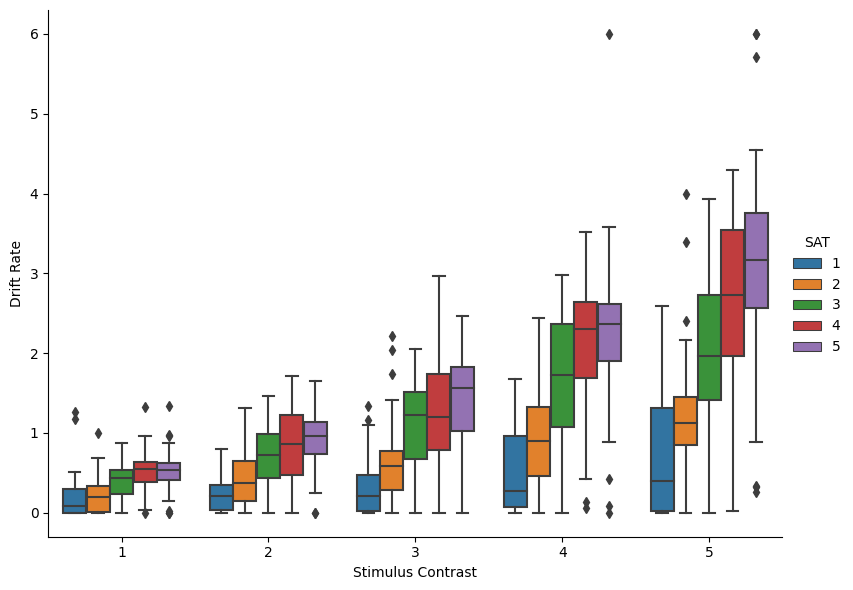

In [83]:
sns.catplot(data=df_alls, x="Stimulus Contrast", y="Drift Rate", hue="SAT", kind="box", errorbar = "ci",
            height=6, aspect=8/6)

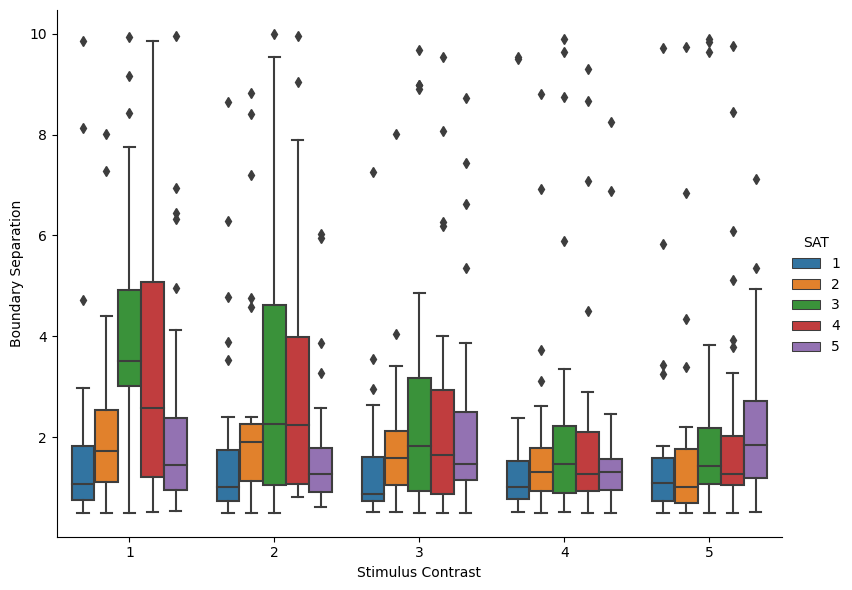

In [104]:
sns.catplot(data=df_alls, x="Stimulus Contrast", y="Boundary Separation", hue="SAT", kind="box",
            height=6, aspect=8/6)

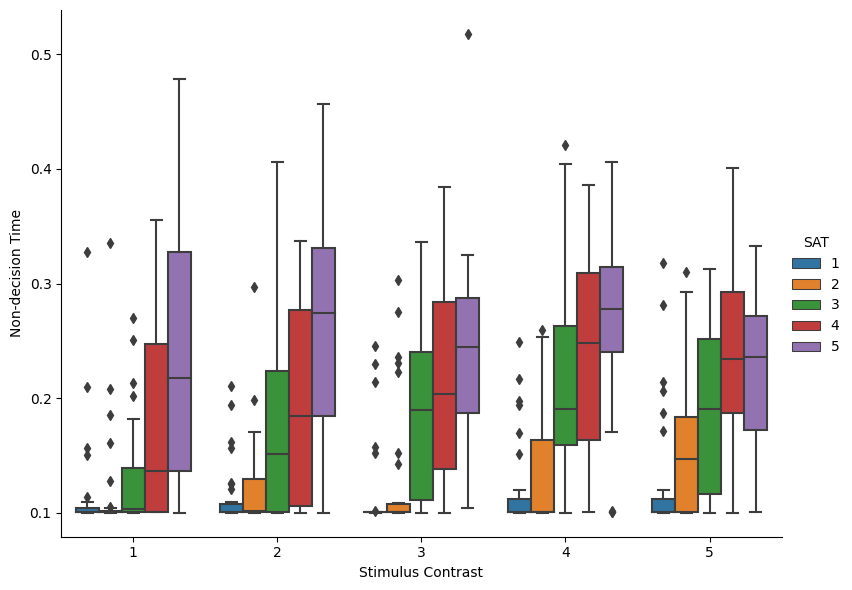

In [105]:
sns.catplot(data=df_alls, x="Stimulus Contrast", y="Non-decision Time", hue="SAT", kind="box",
            height=6, aspect=8/6)

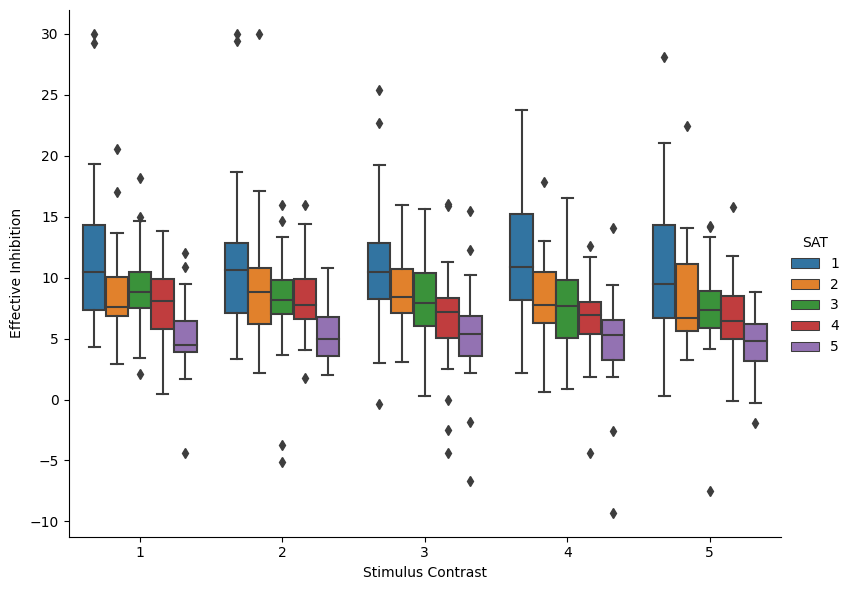

In [92]:
sns.catplot(data=df_alls, x="Stimulus Contrast", y="Effective Inhibition", hue="SAT", kind="box", errorbar = "ci",
            height=6, aspect=8/6)

In [112]:
df_example = df_alls[df_alls["Stimulus Contrast"] == 3]

In [101]:
df_example_1 = df_example[df_example["SAT"] == 1]
df_example_2 = df_example[df_example["SAT"] == 5]

In [102]:
scipy.stats.ttest_rel(df_example_1["Effective Inhibition"], df_example_2["Effective Inhibition"])

Ttest_relResult(statistic=5.695625646523247, pvalue=3.682303520044561e-06)

In [103]:
scipy.stats.ttest_rel(df_example_1["Drift Rate"], df_example_2["Drift Rate"])

Ttest_relResult(statistic=-8.498903096167965, pvalue=2.3042564318874376e-09)

In [106]:
df_example

,Unnamed: 0,Stimulus Contrast,SAT,participant,Drift Rate,Boundary Separation,Non-decision Time,Effective Inhibition
20,22,5,1,1,0.003643,0.782213,0.100955,11.614850
21,23,5,2,1,1.455478,1.034799,0.184229,8.715260
22,24,5,3,1,2.472537,0.599718,0.258114,4.351838
23,25,5,4,1,1.970795,1.113574,0.232003,8.678523
24,26,5,5,1,2.611156,1.170605,0.243964,5.327644
...,...,...,...,...,...,...,...,...
245,247,5,1,30,0.000000,1.270804,0.100128,14.764992
246,248,5,2,30,2.168604,4.345238,0.176434,13.616276
247,249,5,3,30,3.925519,0.833694,0.303050,6.235077
248,250,5,4,30,3.494954,0.748982,0.306886,6.802331


In [113]:
print(AnovaRM(data=df_example, depvar='Drift Rate',
              subject='participant', within=['SAT']).fit())

              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
SAT 31.2678 4.0000 116.0000 0.0000



In [114]:
print(AnovaRM(data=df_example, depvar='Boundary Separation',
              subject='participant', within=['SAT']).fit())


              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
SAT  2.2749 4.0000 116.0000 0.0654



In [115]:
print(AnovaRM(data=df_example, depvar='Non-decision Time',
              subject='participant', within=['SAT']).fit())


              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
SAT 18.2300 4.0000 116.0000 0.0000

